# Facial Expression Detection using Convolutional Neural Networks 🤖📷

Facial expression detection is a fascinating field within computer vision that involves the recognition and interpretation of human emotions based on facial expressions. In this Jupyter Notebook, we'll build a Facial Expression Detection model using Convolutional Neural Networks (CNNs). This model will be trained to classify facial expressions into different emotion categories, such as happiness, sadness, anger, etc. 😊😢😠

### Goal 🚀💻
The primary goal of this project is to create an effective facial expression detection system that can be integrated into various applications, including human-computer interaction, virtual reality, and emotion-aware technology.

### Tools & Libraries 🛠️

We will be using the below tools and libriaries for our implementation
- TensorFlow: An open-source machine learning framework that includes tools for building and training deep learning models.
- Keras: A high-level neural network API that runs on top of TensorFlow, making it easier to build and experiment with deep learning models.
- Matplotlib: A visualisation library 📊🐍

## Implementation Steps
1. **Environment setup:** 
2. **Import necessary libraries:**
3. **Dataset collection:**
4. **Data Augmentation:**
5. **CNN model building:**
6. **Model training:**
7. **Model evaluation:**

Throughout the notebook, we'll provide detailed explanations, code snippets and visualizations to ensure a clear understanding of the entire process. 🧠🛠️

Let's get started! 🚀🚀🚀🚀

## Step 1: Environment setup
Ensure all necessary libraries are installed. Installation can be achieved using the below command

In [ ]:
# Use the pip to install the necessary libraries
# !pip install tensorflow
# !pip install numpy
# !pip install matplotlib
# !pip install opencv-python


# The below code snippet is used to check the versions of the libraries
import tensorflow as tf
import numpy as np
import matplotlib
import cv2

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("OpenCV version:", cv2.__version__)




## Step 2: Import necessary libraries

Import all required libraries in this section of your notebook. It is always good practice to keep your code tidy and well structured.

In [1]:
# operating system libraries
import os
import random

# Open Computer vision libraries
import cv2 as cv

# File operation libraries
import shutil
import yaml

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# visualization libraries
import matplotlib.pyplot as plt

## Step 3: Dataset collection

For the purpose this exercise, we will use facial expression dataset named **[AffectNeT](https://www.kaggle.com/datasets/fatihkgg/affectnet-yolo-format/download?datasetVersionNumber=2)** from Kaggle. 
The **[AffectNeT](https://www.kaggle.com/datasets/fatihkgg/affectnet-yolo-format/download?datasetVersionNumber=2)** dataset is intended for use in YOLO projects involving facial expression recognition.

According to the instructions on the Kaggle website, the entire data set is separated into train-test-validation folders with modified image names and matching txt files with annotations. All images are exactly 96 x 96 pixels.

The dataset is shuffled and divided into three parts:

- train (0.7)
- validation (0.2)
- test (0.1)


There are 8 emotion classes which are mapped as:
- 0- Anger
- 1- Contempt
- 2- Disgust
- 3- Fear
- 4- Happy
- 5- Neutral
- 6- Sad
- 7- Surprise

In [2]:
# Define dataset directory
dataset_dir = "dataset/YOLO_format"

# Define image subdirectories for test, train, validation sets
train_image_dir = os.path.join(dataset_dir, "train", "images")
valid_image_dir = os.path.join(dataset_dir, "valid", "images")
test_image_dir = os.path.join(dataset_dir, "test", "images")

# Define label subdirectories for test, train, validation sets
train_label_dir = os.path.join(dataset_dir, "train", "labels")
valid_label_dir = os.path.join(dataset_dir, "valid", "labels")
test_label_dir = os.path.join(dataset_dir, "test", "labels")

# Lets try and list the image files in each directory
train_images = os.listdir(train_image_dir)
valid_images = os.listdir(valid_image_dir)
test_images = os.listdir(test_image_dir)


In [3]:
# Create a function to display some sample images from each directory
def display_images(directory, images):
    plt.figure(figsize=(8, 8))
    
    # Display 9 random images
    random_images = random.sample(images, 9)
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        img_path = os.path.join(directory, random_images[i])
        
        # Read image using cv.imread
        img = cv.imread(img_path)
        
        # OpenCV loads images in BGR, thus we need to convert to RGB
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        
        # Plot image using matplotlib
        plt.imshow(img)
        plt.axis('off')
        plt.title(images[i])
        

### Image Display

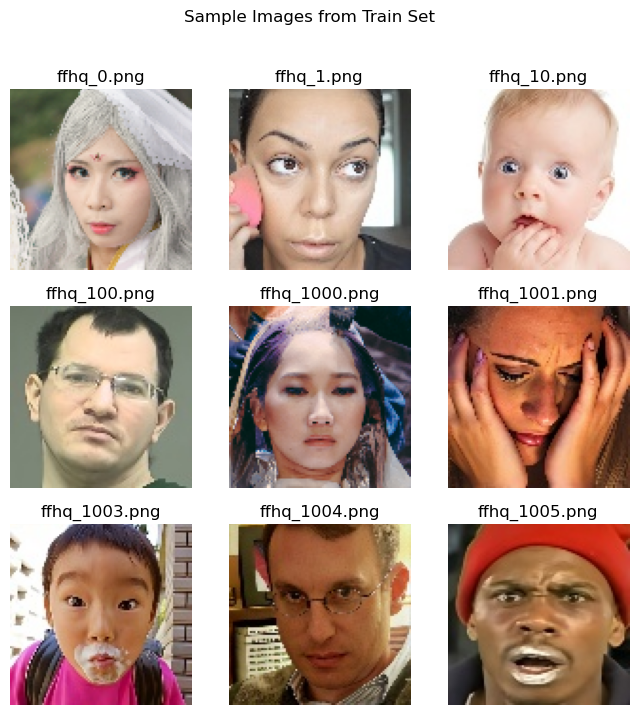

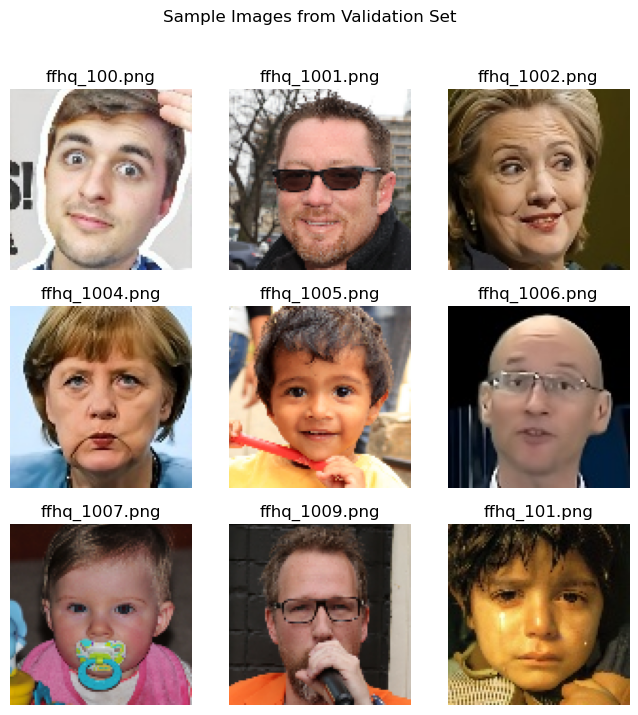

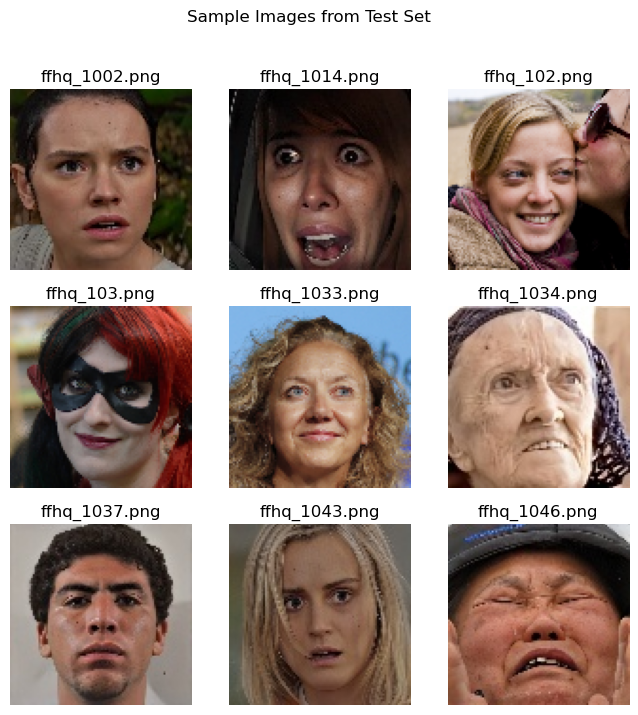

In [4]:
# Display train set images
display_images(train_image_dir, train_images)
plt.suptitle('Sample Images from Train Set')
plt.show()

# Display validation set images
display_images(valid_image_dir, valid_images)
plt.suptitle('Sample Images from Validation Set')
plt.show()

# Display Test set images
display_images(test_image_dir, test_images)
plt.suptitle('Sample Images from Test Set')
plt.show()



### 3.1 Organize YOLO_format dataset into their respective classes


In [20]:
# Lets define label mapping
labels_map = {
    0 : 'Anger',
    1 : 'Contempt',
    2 : 'Disgust',
    3 : 'Fear',
    4 : 'Happy',
    5 : 'Neutral',
    6 : 'Sad',
    7 : 'Suprise'
}

In [42]:
# Lets create a couple of functions to carry out this activity.
     
def organize_images_by_class(image_dir, output_dir, label_path):
    # Create output directory for various classes
    os.makedirs(output_dir, exist_ok=True)

    images = os.listdir(image_dir)
    for image in images:
        image_path = os.path.join(image_dir, image)

        # Extract class label from the label file content
        label_file_path = os.path.join(label_path, os.path.splitext(image)[0] + '.txt')
        if not os.path.exists(label_file_path):
            # Skip if the label file is missing
            print(f"Warning: Label file not found for image {image}")
            continue

        with open(label_file_path, 'r') as label_file:
            class_label = int(label_file.readline().split()[0])

        # Map class label to class name
        class_name = labels_map.get(class_label, f'Unknown_Class_{class_label}')

        # Create class subdirectory if not exists
        class_path = os.path.join(output_dir, class_name)
        os.makedirs(class_path, exist_ok=True)

        # Copy image to the class subdirectory
        shutil.copy(image_path, os.path.join(class_path, image))
        print(f"Organized {image} to {class_name}")

def create_image_datasets(data_path, output_path, label_path):
    # Define paths for train, validation, and test sets
    train_images_dir = os.path.join(data_path, 'train/images')
    train_labels_dir = os.path.join(data_path, 'train/labels')
    train_output_dir = os.path.join(output_path, 'train')

    valid_images_dir = os.path.join(data_path, 'valid/images')
    valid_labels_dir = os.path.join(data_path, 'valid/labels')
    valid_output_dir = os.path.join(output_path, 'valid')

    test_images_dir = os.path.join(data_path, 'test/images')
    test_labels_dir = os.path.join(data_path, 'test/labels')
    test_output_dir = os.path.join(output_path, 'test')

    # Organize images for train set
    organize_images_by_class(train_images_dir, train_output_dir, train_labels_dir)

    # Organize images for validation set
    organize_images_by_class(valid_images_dir, valid_output_dir, valid_labels_dir)

    # Organize images for test set
    organize_images_by_class(test_images_dir, test_output_dir, test_labels_dir)

### Organize YOLO datasets

In [43]:
# Define paths
data_path = "dataset/YOLO_format/"
output_path = "dataset/image_dataset/"
label_path = "dataset/YOLO_format/"

create_image_datasets(data_path, output_path, label_path)

Organized ffhq_0.png to Happy
Organized ffhq_1.png to Happy
Organized ffhq_10.png to Disgust
Organized ffhq_100.png to Suprise
Organized ffhq_1000.png to Contempt
Organized ffhq_1001.png to Happy
Organized ffhq_1003.png to Happy
Organized ffhq_1004.png to Neutral
Organized ffhq_1005.png to Anger
Organized ffhq_1007.png to Happy
Organized ffhq_1008.png to Neutral
Organized ffhq_1009.png to Contempt
Organized ffhq_101.png to Suprise
Organized ffhq_1010.png to Happy
Organized ffhq_1011.png to Happy
Organized ffhq_1012.png to Neutral
Organized ffhq_1013.png to Neutral
Organized ffhq_1015.png to Happy
Organized ffhq_1016.png to Disgust
Organized ffhq_1017.png to Happy
Organized ffhq_1018.png to Happy
Organized ffhq_1019.png to Sad
Organized ffhq_102.png to Suprise
Organized ffhq_1020.png to Neutral
Organized ffhq_1021.png to Happy
Organized ffhq_1022.png to Contempt
Organized ffhq_1023.png to Happy
Organized ffhq_1024.png to Happy
Organized ffhq_1025.png to Happy
Organized ffhq_1026.png to 

Organized ffhq_141.png to Happy
Organized ffhq_1410.png to Happy
Organized ffhq_1411.png to Contempt
Organized ffhq_1412.png to Happy
Organized ffhq_1413.png to Happy
Organized ffhq_1414.png to Neutral
Organized ffhq_1415.png to Happy
Organized ffhq_1416.png to Neutral
Organized ffhq_1417.png to Neutral
Organized ffhq_1418.png to Happy
Organized ffhq_1419.png to Neutral
Organized ffhq_142.png to Suprise
Organized ffhq_1420.png to Contempt
Organized ffhq_1421.png to Happy
Organized ffhq_1423.png to Anger
Organized ffhq_1424.png to Contempt
Organized ffhq_1425.png to Neutral
Organized ffhq_1426.png to Contempt
Organized ffhq_1427.png to Happy
Organized ffhq_1429.png to Suprise
Organized ffhq_143.png to Suprise
Organized ffhq_1430.png to Neutral
Organized ffhq_1431.png to Happy
Organized ffhq_1433.png to Suprise
Organized ffhq_1434.png to Disgust
Organized ffhq_1435.png to Disgust
Organized ffhq_1436.png to Contempt
Organized ffhq_1437.png to Happy
Organized ffhq_1439.png to Happy
Organiz

Organized ffhq_1826.png to Happy
Organized ffhq_1827.png to Neutral
Organized ffhq_1828.png to Happy
Organized ffhq_1829.png to Happy
Organized ffhq_183.png to Fear
Organized ffhq_1830.png to Happy
Organized ffhq_1831.png to Neutral
Organized ffhq_1832.png to Suprise
Organized ffhq_1833.png to Suprise
Organized ffhq_1834.png to Neutral
Organized ffhq_1835.png to Happy
Organized ffhq_1836.png to Happy
Organized ffhq_1837.png to Sad
Organized ffhq_1838.png to Neutral
Organized ffhq_1839.png to Anger
Organized ffhq_184.png to Neutral
Organized ffhq_1840.png to Fear
Organized ffhq_1841.png to Sad
Organized ffhq_1842.png to Happy
Organized ffhq_1843.png to Happy
Organized ffhq_1844.png to Disgust
Organized ffhq_1845.png to Neutral
Organized ffhq_1846.png to Neutral
Organized ffhq_1847.png to Sad
Organized ffhq_1849.png to Happy
Organized ffhq_185.png to Contempt
Organized ffhq_1850.png to Happy
Organized ffhq_1851.png to Happy
Organized ffhq_1852.png to Contempt
Organized ffhq_1853.png to H

Organized ffhq_2231.png to Happy
Organized ffhq_2232.png to Sad
Organized ffhq_2233.png to Disgust
Organized ffhq_2234.png to Neutral
Organized ffhq_2235.png to Disgust
Organized ffhq_2236.png to Neutral
Organized ffhq_2237.png to Happy
Organized ffhq_2238.png to Sad
Organized ffhq_224.png to Contempt
Organized ffhq_2240.png to Happy
Organized ffhq_2241.png to Happy
Organized ffhq_2242.png to Contempt
Organized ffhq_2243.png to Happy
Organized ffhq_2244.png to Happy
Organized ffhq_2246.png to Happy
Organized ffhq_2247.png to Contempt
Organized ffhq_2248.png to Suprise
Organized ffhq_225.png to Fear
Organized ffhq_2250.png to Neutral
Organized ffhq_2251.png to Neutral
Organized ffhq_2252.png to Happy
Organized ffhq_2254.png to Sad
Organized ffhq_2255.png to Contempt
Organized ffhq_2256.png to Happy
Organized ffhq_2257.png to Suprise
Organized ffhq_2258.png to Disgust
Organized ffhq_2259.png to Happy
Organized ffhq_226.png to Suprise
Organized ffhq_2260.png to Happy
Organized ffhq_2261.p

Organized ffhq_2651.png to Suprise
Organized ffhq_2652.png to Happy
Organized ffhq_2653.png to Happy
Organized ffhq_2655.png to Contempt
Organized ffhq_2656.png to Happy
Organized ffhq_2657.png to Anger
Organized ffhq_2658.png to Sad
Organized ffhq_2659.png to Contempt
Organized ffhq_266.png to Disgust
Organized ffhq_2660.png to Happy
Organized ffhq_2661.png to Neutral
Organized ffhq_2662.png to Happy
Organized ffhq_2663.png to Anger
Organized ffhq_2664.png to Anger
Organized ffhq_2665.png to Neutral
Organized ffhq_2667.png to Neutral
Organized ffhq_2668.png to Happy
Organized ffhq_2669.png to Neutral
Organized ffhq_267.png to Suprise
Organized ffhq_2670.png to Fear
Organized ffhq_2671.png to Contempt
Organized ffhq_2672.png to Happy
Organized ffhq_2673.png to Happy
Organized ffhq_2674.png to Happy
Organized ffhq_2676.png to Neutral
Organized ffhq_2677.png to Contempt
Organized ffhq_2678.png to Contempt
Organized ffhq_2679.png to Anger
Organized ffhq_268.png to Suprise
Organized ffhq_2

Organized ffhq_3084.png to Happy
Organized ffhq_3086.png to Suprise
Organized ffhq_3087.png to Happy
Organized ffhq_3088.png to Happy
Organized ffhq_3089.png to Happy
Organized ffhq_309.png to Suprise
Organized ffhq_3090.png to Happy
Organized ffhq_3091.png to Happy
Organized ffhq_3092.png to Happy
Organized ffhq_3093.png to Happy
Organized ffhq_3094.png to Happy
Organized ffhq_3095.png to Happy
Organized ffhq_3096.png to Happy
Organized ffhq_3097.png to Contempt
Organized ffhq_3098.png to Fear
Organized ffhq_3099.png to Happy
Organized ffhq_31.png to Fear
Organized ffhq_310.png to Contempt
Organized ffhq_3100.png to Happy
Organized ffhq_3102.png to Contempt
Organized ffhq_3103.png to Contempt
Organized ffhq_3104.png to Happy
Organized ffhq_3105.png to Happy
Organized ffhq_3106.png to Anger
Organized ffhq_3107.png to Happy
Organized ffhq_3108.png to Happy
Organized ffhq_3109.png to Happy
Organized ffhq_311.png to Suprise
Organized ffhq_3110.png to Happy
Organized ffhq_3111.png to Conte

Organized ffhq_3445.png to Happy
Organized ffhq_3446.png to Happy
Organized ffhq_3447.png to Happy
Organized ffhq_3448.png to Happy
Organized ffhq_3449.png to Disgust
Organized ffhq_345.png to Happy
Organized ffhq_3450.png to Happy
Organized ffhq_3452.png to Suprise
Organized ffhq_3453.png to Happy
Organized ffhq_3454.png to Happy
Organized ffhq_3455.png to Contempt
Organized ffhq_3457.png to Happy
Organized ffhq_3458.png to Happy
Organized ffhq_3459.png to Contempt
Organized ffhq_346.png to Happy
Organized ffhq_3460.png to Happy
Organized ffhq_3464.png to Contempt
Organized ffhq_3465.png to Happy
Organized ffhq_3466.png to Happy
Organized ffhq_3468.png to Sad
Organized ffhq_3469.png to Happy
Organized ffhq_347.png to Happy
Organized ffhq_3470.png to Happy
Organized ffhq_3471.png to Happy
Organized ffhq_3474.png to Suprise
Organized ffhq_3475.png to Happy
Organized ffhq_3476.png to Happy
Organized ffhq_3477.png to Suprise
Organized ffhq_3478.png to Happy
Organized ffhq_348.png to Sad
O

Organized ffhq_3806.png to Happy
Organized ffhq_3807.png to Disgust
Organized ffhq_3808.png to Sad
Organized ffhq_3809.png to Contempt
Organized ffhq_381.png to Suprise
Organized ffhq_3810.png to Neutral
Organized ffhq_3812.png to Happy
Organized ffhq_3813.png to Happy
Organized ffhq_3814.png to Contempt
Organized ffhq_3815.png to Neutral
Organized ffhq_3816.png to Neutral
Organized ffhq_3817.png to Sad
Organized ffhq_3818.png to Happy
Organized ffhq_3819.png to Happy
Organized ffhq_382.png to Suprise
Organized ffhq_3820.png to Neutral
Organized ffhq_3821.png to Disgust
Organized ffhq_3822.png to Happy
Organized ffhq_3823.png to Neutral
Organized ffhq_3825.png to Neutral
Organized ffhq_3826.png to Happy
Organized ffhq_3827.png to Happy
Organized ffhq_3829.png to Contempt
Organized ffhq_383.png to Sad
Organized ffhq_3830.png to Neutral
Organized ffhq_3831.png to Happy
Organized ffhq_3832.png to Happy
Organized ffhq_3833.png to Contempt
Organized ffhq_3834.png to Happy
Organized ffhq_383

Organized ffhq_4092.png to Anger
Organized ffhq_4093.png to Happy
Organized ffhq_4094.png to Neutral
Organized ffhq_4096.png to Happy
Organized ffhq_4097.png to Happy
Organized ffhq_4098.png to Neutral
Organized ffhq_41.png to Happy
Organized ffhq_410.png to Neutral
Organized ffhq_4100.png to Happy
Organized ffhq_4101.png to Happy
Organized ffhq_4103.png to Happy
Organized ffhq_4104.png to Happy
Organized ffhq_4105.png to Happy
Organized ffhq_4106.png to Happy
Organized ffhq_4107.png to Happy
Organized ffhq_4108.png to Fear
Organized ffhq_4109.png to Neutral
Organized ffhq_411.png to Happy
Organized ffhq_4110.png to Contempt
Organized ffhq_4111.png to Happy
Organized ffhq_4113.png to Happy
Organized ffhq_4114.png to Contempt
Organized ffhq_4115.png to Happy
Organized ffhq_4116.png to Happy
Organized ffhq_4117.png to Happy
Organized ffhq_4118.png to Contempt
Organized ffhq_4119.png to Disgust
Organized ffhq_412.png to Suprise
Organized ffhq_4120.png to Happy
Organized ffhq_4121.png to S

Organized ffhq_4382.png to Disgust
Organized ffhq_4383.png to Happy
Organized ffhq_4384.png to Disgust
Organized ffhq_4385.png to Happy
Organized ffhq_4386.png to Disgust
Organized ffhq_4387.png to Anger
Organized ffhq_4388.png to Neutral
Organized ffhq_4389.png to Neutral
Organized ffhq_439.png to Anger
Organized ffhq_4390.png to Happy
Organized ffhq_4391.png to Suprise
Organized ffhq_4392.png to Disgust
Organized ffhq_4393.png to Happy
Organized ffhq_4394.png to Neutral
Organized ffhq_4395.png to Neutral
Organized ffhq_4396.png to Fear
Organized ffhq_4397.png to Anger
Organized ffhq_4399.png to Disgust
Organized ffhq_44.png to Anger
Organized ffhq_440.png to Neutral
Organized ffhq_4400.png to Contempt
Organized ffhq_4401.png to Happy
Organized ffhq_4402.png to Happy
Organized ffhq_4403.png to Anger
Organized ffhq_4404.png to Contempt
Organized ffhq_4405.png to Contempt
Organized ffhq_4406.png to Suprise
Organized ffhq_4408.png to Anger
Organized ffhq_441.png to Suprise
Organized ffhq

Organized ffhq_4682.png to Happy
Organized ffhq_4683.png to Happy
Organized ffhq_4684.png to Contempt
Organized ffhq_4686.png to Happy
Organized ffhq_4687.png to Happy
Organized ffhq_4688.png to Neutral
Organized ffhq_4689.png to Anger
Organized ffhq_4690.png to Anger
Organized ffhq_4691.png to Neutral
Organized ffhq_4692.png to Contempt
Organized ffhq_4693.png to Happy
Organized ffhq_4694.png to Contempt
Organized ffhq_4695.png to Anger
Organized ffhq_4696.png to Neutral
Organized ffhq_4697.png to Neutral
Organized ffhq_4698.png to Contempt
Organized ffhq_4699.png to Happy
Organized ffhq_47.png to Happy
Organized ffhq_4700.png to Neutral
Organized ffhq_4701.png to Neutral
Organized ffhq_4702.png to Disgust
Organized ffhq_4703.png to Happy
Organized ffhq_4704.png to Happy
Organized ffhq_4705.png to Happy
Organized ffhq_4706.png to Suprise
Organized ffhq_4707.png to Happy
Organized ffhq_4709.png to Suprise
Organized ffhq_471.png to Happy
Organized ffhq_4710.png to Neutral
Organized ffhq

Organized ffhq_4980.png to Anger
Organized ffhq_4981.png to Happy
Organized ffhq_4982.png to Neutral
Organized ffhq_4983.png to Happy
Organized ffhq_4984.png to Happy
Organized ffhq_4985.png to Happy
Organized ffhq_4986.png to Contempt
Organized ffhq_4987.png to Happy
Organized ffhq_4988.png to Anger
Organized ffhq_4989.png to Happy
Organized ffhq_4990.png to Sad
Organized ffhq_4991.png to Contempt
Organized ffhq_4993.png to Suprise
Organized ffhq_4994.png to Contempt
Organized ffhq_4995.png to Suprise
Organized ffhq_4996.png to Suprise
Organized ffhq_4998.png to Happy
Organized ffhq_4999.png to Contempt
Organized ffhq_5.png to Suprise
Organized ffhq_50.png to Anger
Organized ffhq_500.png to Happy
Organized ffhq_5001.png to Neutral
Organized ffhq_5002.png to Neutral
Organized ffhq_5003.png to Suprise
Organized ffhq_5005.png to Neutral
Organized ffhq_5006.png to Neutral
Organized ffhq_5007.png to Sad
Organized ffhq_501.png to Contempt
Organized ffhq_5010.png to Neutral
Organized ffhq_50

Organized ffhq_534.png to Sad
Organized ffhq_5340.png to Contempt
Organized ffhq_5341.png to Anger
Organized ffhq_5342.png to Contempt
Organized ffhq_5344.png to Neutral
Organized ffhq_5346.png to Neutral
Organized ffhq_5348.png to Contempt
Organized ffhq_5349.png to Neutral
Organized ffhq_535.png to Sad
Organized ffhq_5351.png to Suprise
Organized ffhq_5352.png to Neutral
Organized ffhq_5353.png to Anger
Organized ffhq_5354.png to Neutral
Organized ffhq_5355.png to Neutral
Organized ffhq_5356.png to Sad
Organized ffhq_5357.png to Suprise
Organized ffhq_5359.png to Suprise
Organized ffhq_536.png to Happy
Organized ffhq_5361.png to Anger
Organized ffhq_5362.png to Contempt
Organized ffhq_5363.png to Contempt
Organized ffhq_5365.png to Suprise
Organized ffhq_5367.png to Contempt
Organized ffhq_5368.png to Neutral
Organized ffhq_5369.png to Suprise
Organized ffhq_537.png to Suprise
Organized ffhq_5372.png to Neutral
Organized ffhq_5374.png to Suprise
Organized ffhq_5375.png to Neutral
Org

Organized ffhq_60.png to Neutral
Organized ffhq_600.png to Happy
Organized ffhq_601.png to Anger
Organized ffhq_602.png to Neutral
Organized ffhq_604.png to Happy
Organized ffhq_605.png to Happy
Organized ffhq_606.png to Happy
Organized ffhq_607.png to Happy
Organized ffhq_608.png to Neutral
Organized ffhq_609.png to Suprise
Organized ffhq_61.png to Contempt
Organized ffhq_610.png to Happy
Organized ffhq_611.png to Suprise
Organized ffhq_612.png to Contempt
Organized ffhq_613.png to Happy
Organized ffhq_614.png to Neutral
Organized ffhq_615.png to Happy
Organized ffhq_616.png to Suprise
Organized ffhq_617.png to Neutral
Organized ffhq_618.png to Sad
Organized ffhq_619.png to Suprise
Organized ffhq_62.png to Suprise
Organized ffhq_620.png to Happy
Organized ffhq_621.png to Happy
Organized ffhq_622.png to Happy
Organized ffhq_623.png to Suprise
Organized ffhq_624.png to Suprise
Organized ffhq_625.png to Neutral
Organized ffhq_626.png to Suprise
Organized ffhq_627.png to Suprise
Organized

Organized ffhq_896.png to Sad
Organized ffhq_897.png to Happy
Organized ffhq_898.png to Happy
Organized ffhq_9.png to Contempt
Organized ffhq_90.png to Disgust
Organized ffhq_900.png to Contempt
Organized ffhq_901.png to Happy
Organized ffhq_902.png to Contempt
Organized ffhq_903.png to Suprise
Organized ffhq_904.png to Neutral
Organized ffhq_905.png to Contempt
Organized ffhq_906.png to Happy
Organized ffhq_907.png to Happy
Organized ffhq_908.png to Sad
Organized ffhq_909.png to Contempt
Organized ffhq_91.png to Contempt
Organized ffhq_910.png to Happy
Organized ffhq_912.png to Happy
Organized ffhq_913.png to Neutral
Organized ffhq_914.png to Contempt
Organized ffhq_915.png to Neutral
Organized ffhq_916.png to Neutral
Organized ffhq_917.png to Neutral
Organized ffhq_918.png to Happy
Organized ffhq_919.png to Disgust
Organized ffhq_92.png to Suprise
Organized ffhq_921.png to Neutral
Organized ffhq_922.png to Happy
Organized ffhq_924.png to Happy
Organized ffhq_925.png to Contempt
Organ

Organized image0002143.jpg to Anger
Organized image0002148.jpg to Sad
Organized image0002152.jpg to Anger
Organized image0002156.jpg to Anger
Organized image0002169.jpg to Sad
Organized image0002170.jpg to Fear
Organized image0002180.jpg to Suprise
Organized image0002194.jpg to Fear
Organized image0002205.jpg to Anger
Organized image0002210.jpg to Disgust
Organized image0002217.jpg to Sad
Organized image0002224.jpg to Sad
Organized image0002226.jpg to Fear
Organized image0002230.jpg to Anger
Organized image0002242.jpg to Sad
Organized image0002256.jpg to Disgust
Organized image0002259.jpg to Disgust
Organized image0002272.jpg to Anger
Organized image0002281.jpg to Anger
Organized image0002301.jpg to Disgust
Organized image0002304.jpg to Neutral
Organized image0002309.jpg to Fear
Organized image0002314.jpg to Fear
Organized image0002334.jpg to Contempt
Organized image0002339.jpg to Suprise
Organized image0002340.jpg to Suprise
Organized image0002348.jpg to Fear
Organized image0002349.jp

Organized image0004625.jpg to Neutral
Organized image0004642.jpg to Anger
Organized image0004656.jpg to Suprise
Organized image0004676.jpg to Sad
Organized image0004683.jpg to Sad
Organized image0004689.jpg to Suprise
Organized image0004693.jpg to Sad
Organized image0004695.jpg to Anger
Organized image0004698.jpg to Suprise
Organized image0004700.jpg to Fear
Organized image0004710.jpg to Anger
Organized image0004714.jpg to Suprise
Organized image0004715.jpg to Anger
Organized image0004721.jpg to Suprise
Organized image0004735.jpg to Sad
Organized image0004758.jpg to Disgust
Organized image0004770.jpg to Fear
Organized image0004781.jpg to Suprise
Organized image0004792.jpg to Anger
Organized image0004794.jpg to Fear
Organized image0004799.jpg to Suprise
Organized image0004801.jpg to Fear
Organized image0004811.jpg to Neutral
Organized image0004819.jpg to Anger
Organized image0004828.jpg to Suprise
Organized image0004832.jpg to Anger
Organized image0004835.jpg to Anger
Organized image000

Organized image0007177.jpg to Suprise
Organized image0007223.jpg to Disgust
Organized image0007257.jpg to Disgust
Organized image0007270.jpg to Sad
Organized image0007271.jpg to Anger
Organized image0007275.jpg to Suprise
Organized image0007283.jpg to Fear
Organized image0007286.jpg to Neutral
Organized image0007290.jpg to Fear
Organized image0007296.jpg to Suprise
Organized image0007300.jpg to Sad
Organized image0007311.jpg to Fear
Organized image0007312.jpg to Anger
Organized image0007323.jpg to Disgust
Organized image0007332.jpg to Disgust
Organized image0007336.jpg to Suprise
Organized image0007337.jpg to Neutral
Organized image0007354.jpg to Sad
Organized image0007355.jpg to Sad
Organized image0007359.jpg to Anger
Organized image0007366.jpg to Sad
Organized image0007374.jpg to Disgust
Organized image0007383.jpg to Fear
Organized image0007403.jpg to Neutral
Organized image0007438.jpg to Sad
Organized image0007445.jpg to Anger
Organized image0007451.jpg to Disgust
Organized image000

Organized image0010331.jpg to Sad
Organized image0010335.jpg to Suprise
Organized image0010343.jpg to Suprise
Organized image0010360.jpg to Sad
Organized image0010368.jpg to Suprise
Organized image0010372.jpg to Suprise
Organized image0010381.jpg to Sad
Organized image0010383.jpg to Disgust
Organized image0010389.jpg to Fear
Organized image0010394.jpg to Disgust
Organized image0010401.jpg to Contempt
Organized image0010431.jpg to Anger
Organized image0010440.jpg to Sad
Organized image0010451.jpg to Sad
Organized image0010473.jpg to Anger
Organized image0010484.jpg to Sad
Organized image0010485.jpg to Neutral
Organized image0010490.jpg to Suprise
Organized image0010491.jpg to Anger
Organized image0010493.jpg to Contempt
Organized image0010494.jpg to Disgust
Organized image0010495.jpg to Suprise
Organized image0010503.jpg to Anger
Organized image0010522.jpg to Anger
Organized image0010531.jpg to Suprise
Organized image0010543.jpg to Suprise
Organized image0010550.jpg to Suprise
Organized

Organized image0012546.jpg to Happy
Organized image0012549.jpg to Contempt
Organized image0012556.jpg to Fear
Organized image0012558.jpg to Suprise
Organized image0012560.jpg to Suprise
Organized image0012579.jpg to Anger
Organized image0012580.jpg to Neutral
Organized image0012582.jpg to Anger
Organized image0012588.jpg to Anger
Organized image0012589.jpg to Neutral
Organized image0012592.jpg to Contempt
Organized image0012596.jpg to Sad
Organized image0012597.jpg to Fear
Organized image0012599.jpg to Suprise
Organized image0012602.jpg to Contempt
Organized image0012618.jpg to Disgust
Organized image0012632.jpg to Sad
Organized image0012636.jpg to Sad
Organized image0012638.jpg to Fear
Organized image0012639.jpg to Anger
Organized image0012648.jpg to Suprise
Organized image0012652.jpg to Contempt
Organized image0012663.jpg to Anger
Organized image0012667.jpg to Sad
Organized image0012670.jpg to Sad
Organized image0012672.jpg to Suprise
Organized image0012673.jpg to Anger
Organized ima

Organized image0014051.jpg to Sad
Organized image0014056.jpg to Suprise
Organized image0014064.jpg to Suprise
Organized image0014066.jpg to Anger
Organized image0014074.jpg to Disgust
Organized image0014084.jpg to Fear
Organized image0014085.jpg to Suprise
Organized image0014086.jpg to Disgust
Organized image0014088.jpg to Fear
Organized image0014095.jpg to Fear
Organized image0014096.jpg to Neutral
Organized image0014098.jpg to Suprise
Organized image0014100.jpg to Anger
Organized image0014107.jpg to Neutral
Organized image0014112.jpg to Contempt
Organized image0014116.jpg to Suprise
Organized image0014118.jpg to Suprise
Organized image0014124.jpg to Suprise
Organized image0014138.jpg to Sad
Organized image0014139.jpg to Neutral
Organized image0014145.jpg to Sad
Organized image0014148.jpg to Contempt
Organized image0014149.jpg to Suprise
Organized image0014157.jpg to Anger
Organized image0014158.jpg to Anger
Organized image0014181.jpg to Sad
Organized image0014193.jpg to Suprise
Organ

Organized image0015505.jpg to Sad
Organized image0015508.jpg to Anger
Organized image0015510.jpg to Neutral
Organized image0015532.jpg to Suprise
Organized image0015536.jpg to Anger
Organized image0015546.jpg to Happy
Organized image0015553.jpg to Anger
Organized image0015555.jpg to Suprise
Organized image0015557.jpg to Anger
Organized image0015568.jpg to Suprise
Organized image0015570.jpg to Suprise
Organized image0015573.jpg to Fear
Organized image0015574.jpg to Sad
Organized image0015576.jpg to Suprise
Organized image0015577.jpg to Anger
Organized image0015583.jpg to Disgust
Organized image0015587.jpg to Anger
Organized image0015590.jpg to Suprise
Organized image0015605.jpg to Anger
Organized image0015613.jpg to Sad
Organized image0015615.jpg to Suprise
Organized image0015618.jpg to Fear
Organized image0015627.jpg to Suprise
Organized image0015630.jpg to Anger
Organized image0015632.jpg to Fear
Organized image0015639.jpg to Anger
Organized image0015644.jpg to Disgust
Organized image

Organized image0016996.jpg to Sad
Organized image0017004.jpg to Sad
Organized image0017011.jpg to Sad
Organized image0017015.jpg to Anger
Organized image0017018.jpg to Sad
Organized image0017028.jpg to Sad
Organized image0017030.jpg to Sad
Organized image0017032.jpg to Neutral
Organized image0017035.jpg to Sad
Organized image0017050.jpg to Neutral
Organized image0017056.jpg to Anger
Organized image0017057.jpg to Suprise
Organized image0017060.jpg to Fear
Organized image0017063.jpg to Anger
Organized image0017064.jpg to Suprise
Organized image0017081.jpg to Suprise
Organized image0017093.jpg to Sad
Organized image0017098.jpg to Disgust
Organized image0017100.jpg to Suprise
Organized image0017124.jpg to Fear
Organized image0017125.jpg to Anger
Organized image0017131.jpg to Neutral
Organized image0017140.jpg to Fear
Organized image0017141.jpg to Anger
Organized image0017158.jpg to Contempt
Organized image0017169.jpg to Suprise
Organized image0017180.jpg to Anger
Organized image0017186.jpg

Organized image0018117.jpg to Fear
Organized image0018119.jpg to Sad
Organized image0018120.jpg to Sad
Organized image0018121.jpg to Suprise
Organized image0018126.jpg to Fear
Organized image0018129.jpg to Suprise
Organized image0018132.jpg to Anger
Organized image0018134.jpg to Sad
Organized image0018135.jpg to Fear
Organized image0018137.jpg to Sad
Organized image0018142.jpg to Anger
Organized image0018144.jpg to Anger
Organized image0018145.jpg to Anger
Organized image0018149.jpg to Contempt
Organized image0018150.jpg to Disgust
Organized image0018153.jpg to Sad
Organized image0018158.jpg to Fear
Organized image0018160.jpg to Neutral
Organized image0018165.jpg to Fear
Organized image0018166.jpg to Anger
Organized image0018167.jpg to Sad
Organized image0018172.jpg to Disgust
Organized image0018174.jpg to Disgust
Organized image0018175.jpg to Anger
Organized image0018186.jpg to Suprise
Organized image0018188.jpg to Suprise
Organized image0018198.jpg to Contempt
Organized image0018205.

Organized image0019082.jpg to Suprise
Organized image0019084.jpg to Sad
Organized image0019089.jpg to Neutral
Organized image0019091.jpg to Anger
Organized image0019092.jpg to Sad
Organized image0019093.jpg to Disgust
Organized image0019099.jpg to Sad
Organized image0019109.jpg to Contempt
Organized image0019110.jpg to Anger
Organized image0019111.jpg to Sad
Organized image0019112.jpg to Anger
Organized image0019113.jpg to Suprise
Organized image0019114.jpg to Sad
Organized image0019122.jpg to Contempt
Organized image0019131.jpg to Disgust
Organized image0019134.jpg to Neutral
Organized image0019135.jpg to Sad
Organized image0019137.jpg to Anger
Organized image0019139.jpg to Anger
Organized image0019140.jpg to Happy
Organized image0019141.jpg to Fear
Organized image0019143.jpg to Fear
Organized image0019152.jpg to Anger
Organized image0019155.jpg to Sad
Organized image0019160.jpg to Suprise
Organized image0019161.jpg to Anger
Organized image0019163.jpg to Contempt
Organized image001916

Organized image0020107.jpg to Sad
Organized image0020112.jpg to Anger
Organized image0020113.jpg to Anger
Organized image0020114.jpg to Suprise
Organized image0020117.jpg to Neutral
Organized image0020121.jpg to Anger
Organized image0020125.jpg to Anger
Organized image0020126.jpg to Contempt
Organized image0020130.jpg to Suprise
Organized image0020133.jpg to Sad
Organized image0020134.jpg to Disgust
Organized image0020135.jpg to Disgust
Organized image0020137.jpg to Neutral
Organized image0020138.jpg to Neutral
Organized image0020143.jpg to Contempt
Organized image0020145.jpg to Fear
Organized image0020148.jpg to Anger
Organized image0020149.jpg to Anger
Organized image0020153.jpg to Suprise
Organized image0020164.jpg to Sad
Organized image0020168.jpg to Sad
Organized image0020171.jpg to Sad
Organized image0020176.jpg to Anger
Organized image0020182.jpg to Anger
Organized image0020187.jpg to Fear
Organized image0020188.jpg to Neutral
Organized image0020189.jpg to Sad
Organized image002

Organized image0021030.jpg to Happy
Organized image0021037.jpg to Suprise
Organized image0021045.jpg to Anger
Organized image0021047.jpg to Suprise
Organized image0021053.jpg to Disgust
Organized image0021055.jpg to Fear
Organized image0021056.jpg to Anger
Organized image0021057.jpg to Suprise
Organized image0021060.jpg to Contempt
Organized image0021061.jpg to Anger
Organized image0021062.jpg to Anger
Organized image0021067.jpg to Sad
Organized image0021071.jpg to Anger
Organized image0021072.jpg to Fear
Organized image0021074.jpg to Suprise
Organized image0021076.jpg to Disgust
Organized image0021083.jpg to Anger
Organized image0021089.jpg to Happy
Organized image0021090.jpg to Fear
Organized image0021091.jpg to Anger
Organized image0021092.jpg to Fear
Organized image0021095.jpg to Sad
Organized image0021097.jpg to Anger
Organized image0021101.jpg to Anger
Organized image0021102.jpg to Anger
Organized image0021104.jpg to Neutral
Organized image0021107.jpg to Sad
Organized image002110

Organized image0021951.jpg to Neutral
Organized image0021952.jpg to Suprise
Organized image0021956.jpg to Sad
Organized image0021957.jpg to Disgust
Organized image0021958.jpg to Sad
Organized image0021963.jpg to Anger
Organized image0021965.jpg to Suprise
Organized image0021969.jpg to Disgust
Organized image0021972.jpg to Sad
Organized image0021975.jpg to Sad
Organized image0021977.jpg to Anger
Organized image0021982.jpg to Anger
Organized image0021983.jpg to Anger
Organized image0021984.jpg to Suprise
Organized image0021985.jpg to Contempt
Organized image0021986.jpg to Sad
Organized image0021989.jpg to Sad
Organized image0021999.jpg to Suprise
Organized image0022005.jpg to Sad
Organized image0022007.jpg to Suprise
Organized image0022008.jpg to Happy
Organized image0022011.jpg to Disgust
Organized image0022012.jpg to Contempt
Organized image0022017.jpg to Anger
Organized image0022019.jpg to Fear
Organized image0022021.jpg to Disgust
Organized image0022023.jpg to Anger
Organized image00

Organized image0022901.jpg to Disgust
Organized image0022902.jpg to Fear
Organized image0022905.jpg to Anger
Organized image0022910.jpg to Sad
Organized image0022915.jpg to Suprise
Organized image0022923.jpg to Suprise
Organized image0022924.jpg to Disgust
Organized image0022927.jpg to Suprise
Organized image0022928.jpg to Sad
Organized image0022930.jpg to Sad
Organized image0022937.jpg to Fear
Organized image0022939.jpg to Happy
Organized image0022942.jpg to Anger
Organized image0022944.jpg to Disgust
Organized image0022956.jpg to Anger
Organized image0022958.jpg to Sad
Organized image0022964.jpg to Suprise
Organized image0022969.jpg to Suprise
Organized image0022975.jpg to Anger
Organized image0022976.jpg to Fear
Organized image0022987.jpg to Sad
Organized image0022990.jpg to Suprise
Organized image0022993.jpg to Fear
Organized image0022995.jpg to Suprise
Organized image0023000.jpg to Neutral
Organized image0023004.jpg to Sad
Organized image0023008.jpg to Contempt
Organized image0023

Organized image0023877.jpg to Disgust
Organized image0023878.jpg to Contempt
Organized image0023882.jpg to Sad
Organized image0023883.jpg to Anger
Organized image0023884.jpg to Fear
Organized image0023888.jpg to Suprise
Organized image0023895.jpg to Suprise
Organized image0023896.jpg to Sad
Organized image0023905.jpg to Fear
Organized image0023906.jpg to Fear
Organized image0023907.jpg to Suprise
Organized image0023908.jpg to Suprise
Organized image0023912.jpg to Disgust
Organized image0023915.jpg to Fear
Organized image0023916.jpg to Anger
Organized image0023917.jpg to Disgust
Organized image0023921.jpg to Anger
Organized image0023922.jpg to Sad
Organized image0023925.jpg to Sad
Organized image0023931.jpg to Fear
Organized image0023936.jpg to Anger
Organized image0023942.jpg to Contempt
Organized image0023943.jpg to Fear
Organized image0023944.jpg to Neutral
Organized image0023945.jpg to Suprise
Organized image0023946.jpg to Sad
Organized image0023951.jpg to Fear
Organized image002396

Organized image0024883.jpg to Sad
Organized image0024884.jpg to Sad
Organized image0024887.jpg to Suprise
Organized image0024890.jpg to Sad
Organized image0024898.jpg to Sad
Organized image0024899.jpg to Suprise
Organized image0024903.jpg to Sad
Organized image0024920.jpg to Neutral
Organized image0024928.jpg to Sad
Organized image0024929.jpg to Disgust
Organized image0024930.jpg to Neutral
Organized image0024933.jpg to Anger
Organized image0024939.jpg to Anger
Organized image0024941.jpg to Disgust
Organized image0024943.jpg to Anger
Organized image0024944.jpg to Fear
Organized image0024949.jpg to Anger
Organized image0024952.jpg to Sad
Organized image0024958.jpg to Suprise
Organized image0024966.jpg to Sad
Organized image0024971.jpg to Contempt
Organized image0024972.jpg to Sad
Organized image0024975.jpg to Disgust
Organized image0024978.jpg to Disgust
Organized image0024979.jpg to Anger
Organized image0024981.jpg to Sad
Organized image0024985.jpg to Anger
Organized image0024988.jpg t

Organized image0025954.jpg to Suprise
Organized image0025968.jpg to Anger
Organized image0025969.jpg to Fear
Organized image0025972.jpg to Fear
Organized image0025977.jpg to Anger
Organized image0025979.jpg to Sad
Organized image0025980.jpg to Suprise
Organized image0025981.jpg to Suprise
Organized image0025985.jpg to Sad
Organized image0025990.jpg to Anger
Organized image0025992.jpg to Neutral
Organized image0025993.jpg to Contempt
Organized image0025995.jpg to Neutral
Organized image0025996.jpg to Disgust
Organized image0025997.jpg to Disgust
Organized image0025999.jpg to Sad
Organized image0026004.jpg to Fear
Organized image0026007.jpg to Fear
Organized image0026008.jpg to Anger
Organized image0026010.jpg to Suprise
Organized image0026016.jpg to Anger
Organized image0026018.jpg to Neutral
Organized image0026021.jpg to Suprise
Organized image0026022.jpg to Anger
Organized image0026024.jpg to Sad
Organized image0026026.jpg to Disgust
Organized image0026028.jpg to Anger
Organized image

Organized image0026799.jpg to Fear
Organized image0026800.jpg to Disgust
Organized image0026804.jpg to Anger
Organized image0026805.jpg to Happy
Organized image0026807.jpg to Disgust
Organized image0026810.jpg to Disgust
Organized image0026812.jpg to Fear
Organized image0026813.jpg to Suprise
Organized image0026815.jpg to Disgust
Organized image0026816.jpg to Anger
Organized image0026817.jpg to Anger
Organized image0026819.jpg to Anger
Organized image0026820.jpg to Anger
Organized image0026821.jpg to Anger
Organized image0026824.jpg to Happy
Organized image0026827.jpg to Happy
Organized image0026828.jpg to Contempt
Organized image0026831.jpg to Disgust
Organized image0026832.jpg to Anger
Organized image0026834.jpg to Sad
Organized image0026835.jpg to Anger
Organized image0026838.jpg to Contempt
Organized image0026843.jpg to Disgust
Organized image0026844.jpg to Anger
Organized image0026847.jpg to Fear
Organized image0026848.jpg to Neutral
Organized image0026850.jpg to Fear
Organized im

Organized image0027444.jpg to Anger
Organized image0027445.jpg to Suprise
Organized image0027446.jpg to Anger
Organized image0027448.jpg to Anger
Organized image0027450.jpg to Anger
Organized image0027451.jpg to Fear
Organized image0027453.jpg to Neutral
Organized image0027457.jpg to Anger
Organized image0027458.jpg to Anger
Organized image0027460.jpg to Suprise
Organized image0027462.jpg to Suprise
Organized image0027464.jpg to Anger
Organized image0027467.jpg to Suprise
Organized image0027468.jpg to Anger
Organized image0027471.jpg to Contempt
Organized image0027472.jpg to Anger
Organized image0027474.jpg to Sad
Organized image0027475.jpg to Anger
Organized image0027476.jpg to Anger
Organized image0027477.jpg to Anger
Organized image0027478.jpg to Suprise
Organized image0027479.jpg to Sad
Organized image0027480.jpg to Anger
Organized image0027481.jpg to Contempt
Organized image0027482.jpg to Disgust
Organized image0027484.jpg to Anger
Organized image0027485.jpg to Disgust
Organized i

Organized image0028092.jpg to Anger
Organized image0028095.jpg to Anger
Organized image0028098.jpg to Sad
Organized image0028099.jpg to Anger
Organized image0028100.jpg to Happy
Organized image0028105.jpg to Contempt
Organized image0028106.jpg to Suprise
Organized image0028109.jpg to Sad
Organized image0028112.jpg to Contempt
Organized image0028113.jpg to Suprise
Organized image0028115.jpg to Sad
Organized image0028118.jpg to Fear
Organized image0028120.jpg to Disgust
Organized image0028121.jpg to Fear
Organized image0028124.jpg to Anger
Organized image0028125.jpg to Sad
Organized image0028129.jpg to Disgust
Organized image0028130.jpg to Fear
Organized image0028131.jpg to Anger
Organized image0028132.jpg to Anger
Organized image0028133.jpg to Sad
Organized image0028135.jpg to Suprise
Organized image0028137.jpg to Suprise
Organized image0028138.jpg to Fear
Organized image0028139.jpg to Anger
Organized image0028142.jpg to Suprise
Organized image0028143.jpg to Fear
Organized image0028145.

Organized image0028736.jpg to Disgust
Organized image0028741.jpg to Sad
Organized image0028744.jpg to Suprise
Organized image0028745.jpg to Anger
Organized image0028746.jpg to Disgust
Organized image0028747.jpg to Neutral
Organized image0028748.jpg to Suprise
Organized image0028756.jpg to Fear
Organized image0028761.jpg to Fear
Organized image0028762.jpg to Anger
Organized image0028763.jpg to Anger
Organized image0028764.jpg to Suprise
Organized image0028766.jpg to Suprise
Organized image0028767.jpg to Suprise
Organized image0028770.jpg to Disgust
Organized image0028774.jpg to Disgust
Organized image0028779.jpg to Fear
Organized image0028783.jpg to Fear
Organized image0028789.jpg to Suprise
Organized image0028790.jpg to Sad
Organized image0028791.jpg to Anger
Organized image0028792.jpg to Disgust
Organized image0028794.jpg to Suprise
Organized image0028796.jpg to Neutral
Organized image0028798.jpg to Disgust
Organized image0028801.jpg to Suprise
Organized image0028802.jpg to Disgust
Or

Organized image0029407.jpg to Sad
Organized image0029414.jpg to Fear
Organized image0029416.jpg to Anger
Organized image0029418.jpg to Neutral
Organized image0029427.jpg to Fear
Organized image0029435.jpg to Disgust
Organized image0029437.jpg to Contempt
Organized image0029438.jpg to Anger
Organized image0029439.jpg to Fear
Organized image0029449.jpg to Anger
Organized image0029451.jpg to Suprise
Organized image0029454.jpg to Disgust
Organized image0029460.jpg to Suprise
Organized image0029463.jpg to Suprise
Organized image0029469.jpg to Anger
Organized image0029471.jpg to Neutral
Organized image0029472.jpg to Disgust
Organized image0029475.jpg to Disgust
Organized image0029478.jpg to Sad
Organized image0029480.jpg to Suprise
Organized image0029481.jpg to Disgust
Organized image0029484.jpg to Disgust
Organized image0029487.jpg to Suprise
Organized image0029488.jpg to Sad
Organized image0029492.jpg to Anger
Organized image0029494.jpg to Anger
Organized image0029495.jpg to Sad
Organized 

Organized image0030022.jpg to Anger
Organized image0030024.jpg to Suprise
Organized image0030026.jpg to Suprise
Organized image0030030.jpg to Anger
Organized image0030031.jpg to Fear
Organized image0030036.jpg to Neutral
Organized image0030037.jpg to Anger
Organized image0030041.jpg to Anger
Organized image0030042.jpg to Suprise
Organized image0030044.jpg to Sad
Organized image0030045.jpg to Fear
Organized image0030046.jpg to Anger
Organized image0030048.jpg to Disgust
Organized image0030049.jpg to Anger
Organized image0030052.jpg to Suprise
Organized image0030053.jpg to Anger
Organized image0030056.jpg to Sad
Organized image0030058.jpg to Fear
Organized image0030070.jpg to Contempt
Organized image0030071.jpg to Sad
Organized image0030079.jpg to Sad
Organized image0030080.jpg to Anger
Organized image0030084.jpg to Suprise
Organized image0030086.jpg to Neutral
Organized image0030088.jpg to Anger
Organized image0030089.jpg to Anger
Organized image0030091.jpg to Fear
Organized image003009

Organized image0030581.jpg to Contempt
Organized image0030583.jpg to Anger
Organized image0030585.jpg to Anger
Organized image0030586.jpg to Anger
Organized image0030587.jpg to Anger
Organized image0030589.jpg to Sad
Organized image0030590.jpg to Anger
Organized image0030591.jpg to Suprise
Organized image0030594.jpg to Fear
Organized image0030595.jpg to Anger
Organized image0030597.jpg to Fear
Organized image0030598.jpg to Neutral
Organized image0030600.jpg to Fear
Organized image0030604.jpg to Anger
Organized image0030605.jpg to Anger
Organized image0030607.jpg to Fear
Organized image0030617.jpg to Anger
Organized image0030618.jpg to Anger
Organized image0030619.jpg to Anger
Organized image0030624.jpg to Anger
Organized image0030628.jpg to Anger
Organized image0030629.jpg to Suprise
Organized image0030632.jpg to Fear
Organized image0030634.jpg to Disgust
Organized image0030636.jpg to Disgust
Organized image0030640.jpg to Neutral
Organized image0030641.jpg to Suprise
Organized image003

Organized image0031152.jpg to Contempt
Organized image0031153.jpg to Neutral
Organized image0031154.jpg to Fear
Organized image0031156.jpg to Fear
Organized image0031158.jpg to Suprise
Organized image0031160.jpg to Disgust
Organized image0031167.jpg to Fear
Organized image0031169.jpg to Contempt
Organized image0031175.jpg to Contempt
Organized image0031177.jpg to Suprise
Organized image0031178.jpg to Suprise
Organized image0031179.jpg to Contempt
Organized image0031180.jpg to Suprise
Organized image0031181.jpg to Suprise
Organized image0031183.jpg to Disgust
Organized image0031186.jpg to Fear
Organized image0031188.jpg to Disgust
Organized image0031189.jpg to Fear
Organized image0031190.jpg to Disgust
Organized image0031194.jpg to Suprise
Organized image0031196.jpg to Suprise
Organized image0031202.jpg to Fear
Organized image0031203.jpg to Happy
Organized image0031204.jpg to Suprise
Organized image0031205.jpg to Suprise
Organized image0031206.jpg to Fear
Organized image0031207.jpg to C

Organized image0031810.jpg to Fear
Organized image0031811.jpg to Suprise
Organized image0031812.jpg to Neutral
Organized image0031814.jpg to Suprise
Organized image0031817.jpg to Suprise
Organized image0031820.jpg to Fear
Organized image0031823.jpg to Neutral
Organized image0031827.jpg to Fear
Organized image0031833.jpg to Disgust
Organized image0031835.jpg to Contempt
Organized image0031836.jpg to Suprise
Organized image0031837.jpg to Disgust
Organized image0031841.jpg to Neutral
Organized image0031844.jpg to Happy
Organized image0031847.jpg to Fear
Organized image0031848.jpg to Fear
Organized image0031852.jpg to Suprise
Organized image0031856.jpg to Neutral
Organized image0031861.jpg to Disgust
Organized image0031862.jpg to Anger
Organized image0031866.jpg to Contempt
Organized image0031867.jpg to Fear
Organized image0031868.jpg to Fear
Organized image0031870.jpg to Fear
Organized image0031871.jpg to Suprise
Organized image0031872.jpg to Suprise
Organized image0031873.jpg to Neutral


Organized image0032442.jpg to Contempt
Organized image0032444.jpg to Suprise
Organized image0032445.jpg to Fear
Organized image0032446.jpg to Contempt
Organized image0032447.jpg to Fear
Organized image0032450.jpg to Contempt
Organized image0032452.jpg to Suprise
Organized image0032455.jpg to Suprise
Organized image0032457.jpg to Suprise
Organized image0032458.jpg to Contempt
Organized image0032459.jpg to Fear
Organized image0032461.jpg to Suprise
Organized image0032464.jpg to Neutral
Organized image0032465.jpg to Disgust
Organized image0032471.jpg to Neutral
Organized image0032472.jpg to Fear
Organized image0032474.jpg to Suprise
Organized image0032475.jpg to Sad
Organized image0032483.jpg to Anger
Organized image0032485.jpg to Anger
Organized image0032490.jpg to Suprise
Organized image0032495.jpg to Neutral
Organized image0032496.jpg to Fear
Organized image0032497.jpg to Suprise
Organized image0032501.jpg to Suprise
Organized image0032502.jpg to Anger
Organized image0032505.jpg to Dis

Organized image0033139.jpg to Suprise
Organized image0033141.jpg to Fear
Organized image0033142.jpg to Happy
Organized image0033144.jpg to Fear
Organized image0033146.jpg to Anger
Organized image0033148.jpg to Fear
Organized image0033153.jpg to Suprise
Organized image0033160.jpg to Contempt
Organized image0033161.jpg to Suprise
Organized image0033166.jpg to Suprise
Organized image0033167.jpg to Anger
Organized image0033172.jpg to Suprise
Organized image0033175.jpg to Fear
Organized image0033178.jpg to Happy
Organized image0033181.jpg to Suprise
Organized image0033183.jpg to Suprise
Organized image0033184.jpg to Contempt
Organized image0033190.jpg to Suprise
Organized image0033192.jpg to Sad
Organized image0033194.jpg to Suprise
Organized image0033197.jpg to Suprise
Organized image0033199.jpg to Disgust
Organized image0033202.jpg to Suprise
Organized image0033203.jpg to Disgust
Organized image0033206.jpg to Fear
Organized image0033207.jpg to Anger
Organized image0033210.jpg to Disgust
O

Organized image0033663.jpg to Contempt
Organized image0033664.jpg to Disgust
Organized image0033665.jpg to Fear
Organized image0033666.jpg to Fear
Organized image0033667.jpg to Disgust
Organized image0033668.jpg to Anger
Organized image0033669.jpg to Disgust
Organized image0033673.jpg to Fear
Organized image0033674.jpg to Suprise
Organized image0033676.jpg to Suprise
Organized image0033678.jpg to Disgust
Organized image0033679.jpg to Suprise
Organized image0033681.jpg to Fear
Organized image0033682.jpg to Fear
Organized image0033683.jpg to Contempt
Organized image0033688.jpg to Neutral
Organized image0033689.jpg to Suprise
Organized image0033692.jpg to Suprise
Organized image0033694.jpg to Suprise
Organized image0033695.jpg to Suprise
Organized image0033698.jpg to Suprise
Organized image0033700.jpg to Sad
Organized image0033701.jpg to Suprise
Organized image0033702.jpg to Suprise
Organized image0033704.jpg to Suprise
Organized image0033707.jpg to Suprise
Organized image0033708.jpg to F

Organized image0034364.jpg to Contempt
Organized image0034366.jpg to Disgust
Organized image0034367.jpg to Disgust
Organized image0034369.jpg to Anger
Organized image0034372.jpg to Suprise
Organized image0034378.jpg to Suprise
Organized image0034384.jpg to Suprise
Organized image0034386.jpg to Suprise
Organized image0034390.jpg to Neutral
Organized image0034392.jpg to Suprise
Organized image0034394.jpg to Contempt
Organized image0034397.jpg to Disgust
Organized image0034401.jpg to Suprise
Organized image0034404.jpg to Suprise
Organized image0034405.jpg to Contempt
Organized image0034406.jpg to Suprise
Organized image0034408.jpg to Contempt
Organized image0034409.jpg to Suprise
Organized image0034414.jpg to Suprise
Organized image0034415.jpg to Suprise
Organized image0034419.jpg to Sad
Organized image0034420.jpg to Fear
Organized image0034422.jpg to Happy
Organized image0034423.jpg to Disgust
Organized image0034426.jpg to Suprise
Organized image0034430.jpg to Fear
Organized image0034431

Organized image0034939.jpg to Neutral
Organized image0034940.jpg to Fear
Organized image0034942.jpg to Fear
Organized image0034945.jpg to Disgust
Organized image0034946.jpg to Happy
Organized image0034947.jpg to Suprise
Organized image0034949.jpg to Anger
Organized image0034951.jpg to Suprise
Organized image0034952.jpg to Contempt
Organized image0034954.jpg to Disgust
Organized image0034955.jpg to Suprise
Organized image0034957.jpg to Suprise
Organized image0034960.jpg to Suprise
Organized image0034961.jpg to Suprise
Organized image0034966.jpg to Suprise
Organized image0034971.jpg to Disgust
Organized image0034972.jpg to Contempt
Organized image0034973.jpg to Neutral
Organized image0034978.jpg to Disgust
Organized image0034979.jpg to Fear
Organized image0034981.jpg to Disgust
Organized image0034983.jpg to Disgust
Organized image0034984.jpg to Contempt
Organized image0034987.jpg to Disgust
Organized image0034989.jpg to Suprise
Organized image0034991.jpg to Neutral
Organized image0034993

Organized image0035540.jpg to Contempt
Organized image0035542.jpg to Disgust
Organized image0035543.jpg to Contempt
Organized image0035551.jpg to Fear
Organized image0035552.jpg to Fear
Organized image0035554.jpg to Contempt
Organized image0035557.jpg to Neutral
Organized image0035558.jpg to Fear
Organized image0035564.jpg to Fear
Organized image0035565.jpg to Fear
Organized image0035566.jpg to Disgust
Organized image0035567.jpg to Fear
Organized image0035568.jpg to Contempt
Organized image0035573.jpg to Disgust
Organized image0035575.jpg to Anger
Organized image0035577.jpg to Disgust
Organized image0035579.jpg to Disgust
Organized image0035584.jpg to Fear
Organized image0035585.jpg to Contempt
Organized image0035586.jpg to Disgust
Organized image0035587.jpg to Disgust
Organized image0035591.jpg to Contempt
Organized image0035595.jpg to Fear
Organized image0035597.jpg to Fear
Organized image0035599.jpg to Fear
Organized image0035602.jpg to Disgust
Organized image0035604.jpg to Disgust


Organized image0036198.jpg to Fear
Organized image0036199.jpg to Contempt
Organized image0036200.jpg to Fear
Organized image0036201.jpg to Contempt
Organized image0036203.jpg to Contempt
Organized image0036204.jpg to Disgust
Organized image0036207.jpg to Disgust
Organized image0036209.jpg to Contempt
Organized image0036214.jpg to Anger
Organized image0036215.jpg to Fear
Organized image0036217.jpg to Fear
Organized image0036218.jpg to Fear
Organized image0036220.jpg to Anger
Organized image0036223.jpg to Neutral
Organized image0036225.jpg to Neutral
Organized image0036227.jpg to Anger
Organized image0036229.jpg to Disgust
Organized image0036230.jpg to Happy
Organized image0036232.jpg to Disgust
Organized image0036235.jpg to Fear
Organized image0036237.jpg to Fear
Organized image0036238.jpg to Disgust
Organized image0036241.jpg to Fear
Organized image0036244.jpg to Disgust
Organized image0036249.jpg to Anger
Organized image0036251.jpg to Suprise
Organized image0036253.jpg to Fear
Organiz

Organized image0036887.jpg to Disgust
Organized image0036888.jpg to Suprise
Organized image0036889.jpg to Anger
Organized image0036891.jpg to Fear
Organized image0036892.jpg to Fear
Organized image0036894.jpg to Fear
Organized image0036897.jpg to Disgust
Organized image0036900.jpg to Fear
Organized image0036901.jpg to Neutral
Organized image0036904.jpg to Fear
Organized image0036905.jpg to Contempt
Organized image0036906.jpg to Fear
Organized image0036908.jpg to Contempt
Organized image0036912.jpg to Anger
Organized image0036913.jpg to Disgust
Organized image0036928.jpg to Contempt
Organized image0036933.jpg to Anger
Organized image0036934.jpg to Disgust
Organized image0036935.jpg to Disgust
Organized image0036936.jpg to Fear
Organized image0036937.jpg to Contempt
Organized image0036939.jpg to Fear
Organized image0036941.jpg to Contempt
Organized image0036952.jpg to Fear
Organized image0036954.jpg to Fear
Organized image0036958.jpg to Contempt
Organized image0036959.jpg to Fear
Organiz

Organized image0037561.jpg to Suprise
Organized image0037564.jpg to Fear
Organized image0037568.jpg to Contempt
Organized image0037575.jpg to Contempt
Organized image0037579.jpg to Suprise
Organized image0037580.jpg to Fear
Organized image0037581.jpg to Anger
Organized image0037586.jpg to Suprise
Organized image0037588.jpg to Contempt
Organized image0037593.jpg to Neutral
Organized image0037597.jpg to Disgust
Organized image0037598.jpg to Contempt
Organized image0037600.jpg to Contempt
Organized image0037602.jpg to Disgust
Organized image0037604.jpg to Fear
Organized image0037606.jpg to Fear
Organized image0037610.jpg to Contempt
Organized image0037612.jpg to Fear
Organized image0037615.jpg to Contempt
Organized image0037616.jpg to Disgust
Organized image0037617.jpg to Fear
Organized image0037619.jpg to Contempt
Organized image0037623.jpg to Suprise
Organized image0037624.jpg to Disgust
Organized image0037625.jpg to Fear
Organized image0037627.jpg to Fear
Organized image0037630.jpg to 

Organized image0038245.jpg to Fear
Organized image0038247.jpg to Fear
Organized image0038248.jpg to Contempt
Organized image0038252.jpg to Contempt
Organized image0038253.jpg to Disgust
Organized image0038254.jpg to Contempt
Organized image0038258.jpg to Happy
Organized image0038262.jpg to Disgust
Organized image0038263.jpg to Fear
Organized image0038265.jpg to Fear
Organized image0038268.jpg to Disgust
Organized image0038269.jpg to Fear
Organized image0038270.jpg to Fear
Organized image0038272.jpg to Anger
Organized image0038274.jpg to Fear
Organized image0038276.jpg to Disgust
Organized image0038277.jpg to Happy
Organized image0038279.jpg to Neutral
Organized image0038282.jpg to Disgust
Organized image0038283.jpg to Happy
Organized image0038284.jpg to Disgust
Organized image0038285.jpg to Contempt
Organized image0038286.jpg to Disgust
Organized image0038290.jpg to Anger
Organized image0038294.jpg to Suprise
Organized image0038295.jpg to Disgust
Organized image0038296.jpg to Disgust
O

Organized image0038774.jpg to Contempt
Organized image0038775.jpg to Contempt
Organized image0038780.jpg to Suprise
Organized image0038786.jpg to Disgust
Organized image0038787.jpg to Contempt
Organized image0038792.jpg to Disgust
Organized image0038794.jpg to Disgust
Organized image0038795.jpg to Fear
Organized image0038796.jpg to Disgust
Organized image0038800.jpg to Neutral
Organized image0038802.jpg to Disgust
Organized image0038803.jpg to Fear
Organized image0038806.jpg to Disgust
Organized image0038807.jpg to Fear
Organized image0038808.jpg to Disgust
Organized image0038814.jpg to Suprise
Organized image0038815.jpg to Contempt
Organized image0038817.jpg to Fear
Organized image0038820.jpg to Disgust
Organized image0038823.jpg to Neutral
Organized image0038824.jpg to Suprise
Organized image0038825.jpg to Suprise
Organized image0038826.jpg to Fear
Organized image0038827.jpg to Suprise
Organized image0038828.jpg to Fear
Organized image0038831.jpg to Contempt
Organized image0038834.jp

Organized image0039364.jpg to Anger
Organized image0039366.jpg to Neutral
Organized image0039367.jpg to Sad
Organized image0039371.jpg to Disgust
Organized image0039372.jpg to Anger
Organized image0039373.jpg to Contempt
Organized image0039374.jpg to Contempt
Organized image0039379.jpg to Fear
Organized image0039380.jpg to Sad
Organized image0039385.jpg to Disgust
Organized image0039387.jpg to Happy
Organized image0039388.jpg to Anger
Organized image0039390.jpg to Disgust
Organized image0039391.jpg to Disgust
Organized image0039393.jpg to Fear
Organized image0039397.jpg to Disgust
Organized image0039398.jpg to Contempt
Organized image0039399.jpg to Disgust
Organized image0039401.jpg to Fear
Organized image0039402.jpg to Disgust
Organized image0039403.jpg to Disgust
Organized image0039406.jpg to Contempt
Organized image0039407.jpg to Sad
Organized image0039409.jpg to Contempt
Organized image0039410.jpg to Contempt
Organized image0039412.jpg to Contempt
Organized image0039419.jpg to Fear

Organized image0040033.jpg to Disgust
Organized image0040035.jpg to Fear
Organized image0040036.jpg to Disgust
Organized image0040044.jpg to Fear
Organized image0040046.jpg to Disgust
Organized image0040047.jpg to Sad
Organized image0040053.jpg to Contempt
Organized image0040054.jpg to Suprise
Organized image0040055.jpg to Contempt
Organized image0040056.jpg to Fear
Organized image0040061.jpg to Suprise
Organized image0040062.jpg to Disgust
Organized image0040063.jpg to Disgust
Organized image0040065.jpg to Disgust
Organized image0040069.jpg to Fear
Organized image0040072.jpg to Fear
Organized image0040073.jpg to Fear
Organized image0040074.jpg to Sad
Organized image0040077.jpg to Disgust
Organized image0040081.jpg to Disgust
Organized image0040082.jpg to Anger
Organized image0040086.jpg to Contempt
Organized image0040087.jpg to Fear
Organized image0040088.jpg to Disgust
Organized image0040095.jpg to Fear
Organized image0040096.jpg to Contempt
Organized image0040099.jpg to Contempt
Org

Organized image0040679.jpg to Neutral
Organized image0040682.jpg to Contempt
Organized image0040685.jpg to Contempt
Organized image0040686.jpg to Fear
Organized image0040687.jpg to Happy
Organized image0040689.jpg to Contempt
Organized image0040690.jpg to Fear
Organized image0040691.jpg to Anger
Organized image0040695.jpg to Contempt
Organized image0040696.jpg to Fear
Organized image0040700.jpg to Suprise
Organized image0040702.jpg to Fear
Organized image0040708.jpg to Fear
Organized image0040713.jpg to Happy
Organized image0040714.jpg to Disgust
Organized image0040715.jpg to Contempt
Organized image0040716.jpg to Disgust
Organized image0040718.jpg to Fear
Organized image0040720.jpg to Disgust
Organized image0040721.jpg to Contempt
Organized image0040722.jpg to Disgust
Organized image0040723.jpg to Disgust
Organized image0040725.jpg to Fear
Organized image0040726.jpg to Sad
Organized image0040727.jpg to Fear
Organized image0040730.jpg to Anger
Organized image0040733.jpg to Fear
Organiz

Organized image0041283.jpg to Contempt
Organized image0041284.jpg to Happy
Organized image0041287.jpg to Disgust
Organized image0041289.jpg to Contempt
Organized image0041290.jpg to Contempt
Organized image0041292.jpg to Contempt
Organized image0041295.jpg to Contempt
Organized image0041296.jpg to Disgust
Organized image0041298.jpg to Disgust
Organized image0041299.jpg to Anger
Organized image0041302.jpg to Sad
Organized image0041303.jpg to Contempt
Organized image0041306.jpg to Disgust
Organized image0041308.jpg to Contempt
Organized image0041313.jpg to Neutral
Organized image0041315.jpg to Suprise
Organized image0041317.jpg to Disgust
Organized image0041318.jpg to Contempt
Organized image0041319.jpg to Anger
Organized image0041324.jpg to Neutral
Organized image0041326.jpg to Disgust
Organized image0041329.jpg to Contempt
Organized image0041330.jpg to Sad
Organized image0041337.jpg to Disgust
Organized image0041338.jpg to Fear
Organized image0041340.jpg to Contempt
Organized image0041

Organized image0041903.jpg to Contempt
Organized image0041905.jpg to Contempt
Organized image0041906.jpg to Disgust
Organized image0041907.jpg to Suprise
Organized image0041909.jpg to Disgust
Organized image0041910.jpg to Disgust
Organized image0041912.jpg to Disgust
Organized image0041913.jpg to Contempt
Organized image0041914.jpg to Contempt
Organized image0041915.jpg to Contempt
Organized image0041916.jpg to Anger
Organized image0041917.jpg to Contempt
Organized image0041919.jpg to Disgust
Organized image0041927.jpg to Disgust
Organized image0041929.jpg to Contempt
Organized image0041931.jpg to Contempt
Organized image0041932.jpg to Neutral
Organized image0041933.jpg to Disgust
Organized image0041936.jpg to Disgust
Organized image0041938.jpg to Disgust
Organized image0041939.jpg to Contempt
Organized image0041940.jpg to Disgust
Organized image0041941.jpg to Anger
Organized image0041942.jpg to Disgust
Organized image0041943.jpg to Contempt
Organized image0041947.jpg to Disgust
Organi

Organized image0042545.jpg to Contempt
Organized image0042548.jpg to Neutral
Organized image0042549.jpg to Contempt
Organized image0042550.jpg to Disgust
Organized image0042551.jpg to Happy
Organized image0042552.jpg to Contempt
Organized image1000008.jpg to Happy
Organized image10000099.jpg to Contempt
Organized ffhq_100.png to Neutral
Organized ffhq_1001.png to Neutral
Organized ffhq_1002.png to Suprise
Organized ffhq_1004.png to Happy
Organized ffhq_1005.png to Happy
Organized ffhq_1006.png to Suprise
Organized ffhq_1007.png to Neutral
Organized ffhq_1009.png to Sad
Organized ffhq_101.png to Contempt
Organized ffhq_1010.png to Neutral
Organized ffhq_1013.png to Happy
Organized ffhq_1015.png to Neutral
Organized ffhq_1016.png to Happy
Organized ffhq_1019.png to Happy
Organized ffhq_102.png to Fear
Organized ffhq_1020.png to Disgust
Organized ffhq_1023.png to Neutral
Organized ffhq_1024.png to Neutral
Organized ffhq_103.png to Sad
Organized ffhq_1031.png to Sad
Organized ffhq_1036.png

Organized ffhq_1683.png to Disgust
Organized ffhq_1684.png to Neutral
Organized ffhq_1686.png to Fear
Organized ffhq_1687.png to Neutral
Organized ffhq_1689.png to Happy
Organized ffhq_1690.png to Neutral
Organized ffhq_1693.png to Sad
Organized ffhq_17.png to Suprise
Organized ffhq_170.png to Happy
Organized ffhq_1701.png to Disgust
Organized ffhq_1703.png to Contempt
Organized ffhq_1708.png to Happy
Organized ffhq_171.png to Disgust
Organized ffhq_1711.png to Neutral
Organized ffhq_1713.png to Neutral
Organized ffhq_1716.png to Sad
Organized ffhq_1723.png to Happy
Organized ffhq_1725.png to Happy
Organized ffhq_1728.png to Disgust
Organized ffhq_1729.png to Sad
Organized ffhq_1731.png to Happy
Organized ffhq_1732.png to Anger
Organized ffhq_1733.png to Sad
Organized ffhq_1736.png to Suprise
Organized ffhq_1737.png to Contempt
Organized ffhq_174.png to Sad
Organized ffhq_1743.png to Contempt
Organized ffhq_1748.png to Happy
Organized ffhq_175.png to Suprise
Organized ffhq_1751.png to 

Organized ffhq_24.png to Suprise
Organized ffhq_240.png to Suprise
Organized ffhq_2405.png to Happy
Organized ffhq_2410.png to Suprise
Organized ffhq_2413.png to Happy
Organized ffhq_2414.png to Anger
Organized ffhq_2417.png to Suprise
Organized ffhq_2424.png to Happy
Organized ffhq_2425.png to Happy
Organized ffhq_2429.png to Happy
Organized ffhq_243.png to Suprise
Organized ffhq_2430.png to Suprise
Organized ffhq_2435.png to Sad
Organized ffhq_2439.png to Neutral
Organized ffhq_2442.png to Happy
Organized ffhq_2443.png to Suprise
Organized ffhq_2448.png to Neutral
Organized ffhq_245.png to Contempt
Organized ffhq_2450.png to Happy
Organized ffhq_2451.png to Happy
Organized ffhq_2452.png to Contempt
Organized ffhq_2455.png to Happy
Organized ffhq_2456.png to Sad
Organized ffhq_2458.png to Neutral
Organized ffhq_2462.png to Contempt
Organized ffhq_2464.png to Happy
Organized ffhq_2467.png to Sad
Organized ffhq_2472.png to Neutral
Organized ffhq_2475.png to Neutral
Organized ffhq_248.pn

Organized ffhq_3272.png to Contempt
Organized ffhq_3278.png to Happy
Organized ffhq_328.png to Happy
Organized ffhq_3280.png to Suprise
Organized ffhq_3281.png to Happy
Organized ffhq_3282.png to Happy
Organized ffhq_3287.png to Happy
Organized ffhq_329.png to Neutral
Organized ffhq_3296.png to Neutral
Organized ffhq_3297.png to Happy
Organized ffhq_33.png to Happy
Organized ffhq_3307.png to Contempt
Organized ffhq_3308.png to Happy
Organized ffhq_331.png to Happy
Organized ffhq_3311.png to Happy
Organized ffhq_3318.png to Happy
Organized ffhq_3319.png to Happy
Organized ffhq_3320.png to Happy
Organized ffhq_3330.png to Contempt
Organized ffhq_3339.png to Happy
Organized ffhq_3352.png to Contempt
Organized ffhq_3359.png to Happy
Organized ffhq_3366.png to Contempt
Organized ffhq_3371.png to Happy
Organized ffhq_3376.png to Happy
Organized ffhq_3380.png to Contempt
Organized ffhq_3382.png to Happy
Organized ffhq_3387.png to Suprise
Organized ffhq_3390.png to Happy
Organized ffhq_3393.pn

Organized ffhq_4189.png to Contempt
Organized ffhq_4190.png to Contempt
Organized ffhq_4192.png to Happy
Organized ffhq_4194.png to Happy
Organized ffhq_4195.png to Sad
Organized ffhq_4199.png to Contempt
Organized ffhq_4203.png to Disgust
Organized ffhq_4208.png to Disgust
Organized ffhq_4209.png to Disgust
Organized ffhq_421.png to Happy
Organized ffhq_4212.png to Happy
Organized ffhq_4213.png to Happy
Organized ffhq_4214.png to Disgust
Organized ffhq_4219.png to Happy
Organized ffhq_4222.png to Happy
Organized ffhq_4228.png to Happy
Organized ffhq_4231.png to Happy
Organized ffhq_4235.png to Happy
Organized ffhq_4236.png to Happy
Organized ffhq_4240.png to Contempt
Organized ffhq_4243.png to Happy
Organized ffhq_4248.png to Neutral
Organized ffhq_4250.png to Happy
Organized ffhq_4254.png to Fear
Organized ffhq_4255.png to Happy
Organized ffhq_4258.png to Suprise
Organized ffhq_426.png to Fear
Organized ffhq_4261.png to Happy
Organized ffhq_427.png to Happy
Organized ffhq_4272.png to

Organized ffhq_4981.png to Neutral
Organized ffhq_4982.png to Happy
Organized ffhq_499.png to Fear
Organized ffhq_4995.png to Disgust
Organized ffhq_4997.png to Happy
Organized ffhq_5.png to Suprise
Organized ffhq_50.png to Contempt
Organized ffhq_5000.png to Contempt
Organized ffhq_5004.png to Neutral
Organized ffhq_5009.png to Anger
Organized ffhq_501.png to Suprise
Organized ffhq_5018.png to Neutral
Organized ffhq_502.png to Fear
Organized ffhq_5020.png to Contempt
Organized ffhq_5026.png to Neutral
Organized ffhq_5028.png to Disgust
Organized ffhq_5031.png to Anger
Organized ffhq_504.png to Suprise
Organized ffhq_5040.png to Neutral
Organized ffhq_5041.png to Neutral
Organized ffhq_5043.png to Sad
Organized ffhq_5046.png to Neutral
Organized ffhq_5049.png to Neutral
Organized ffhq_505.png to Fear
Organized ffhq_5053.png to Anger
Organized ffhq_506.png to Neutral
Organized ffhq_5061.png to Neutral
Organized ffhq_5069.png to Contempt
Organized ffhq_5075.png to Suprise
Organized ffhq_

Organized ffhq_83.png to Suprise
Organized ffhq_830.png to Contempt
Organized ffhq_832.png to Anger
Organized ffhq_834.png to Happy
Organized ffhq_837.png to Neutral
Organized ffhq_838.png to Happy
Organized ffhq_839.png to Neutral
Organized ffhq_84.png to Anger
Organized ffhq_841.png to Suprise
Organized ffhq_844.png to Happy
Organized ffhq_851.png to Suprise
Organized ffhq_853.png to Neutral
Organized ffhq_854.png to Happy
Organized ffhq_855.png to Happy
Organized ffhq_86.png to Suprise
Organized ffhq_860.png to Happy
Organized ffhq_861.png to Happy
Organized ffhq_87.png to Suprise
Organized ffhq_870.png to Sad
Organized ffhq_876.png to Disgust
Organized ffhq_877.png to Neutral
Organized ffhq_878.png to Happy
Organized ffhq_881.png to Suprise
Organized ffhq_883.png to Neutral
Organized ffhq_884.png to Happy
Organized ffhq_886.png to Happy
Organized ffhq_888.png to Neutral
Organized ffhq_891.png to Contempt
Organized ffhq_892.png to Suprise
Organized ffhq_895.png to Contempt
Organized

Organized image0008136.jpg to Suprise
Organized image0008213.jpg to Suprise
Organized image0008218.jpg to Anger
Organized image0008228.jpg to Anger
Organized image0008236.jpg to Contempt
Organized image0008255.jpg to Neutral
Organized image0008317.jpg to Sad
Organized image0008355.jpg to Anger
Organized image0008361.jpg to Sad
Organized image0008447.jpg to Fear
Organized image0008474.jpg to Suprise
Organized image0008489.jpg to Suprise
Organized image0008510.jpg to Sad
Organized image0008528.jpg to Contempt
Organized image0008558.jpg to Anger
Organized image0008581.jpg to Disgust
Organized image0008625.jpg to Anger
Organized image0008718.jpg to Fear
Organized image0008894.jpg to Anger
Organized image0008899.jpg to Neutral
Organized image0008935.jpg to Fear
Organized image0008939.jpg to Fear
Organized image0008970.jpg to Anger
Organized image0008986.jpg to Suprise
Organized image0009004.jpg to Disgust
Organized image0009017.jpg to Anger
Organized image0009033.jpg to Suprise
Organized im

Organized image0015572.jpg to Disgust
Organized image0015635.jpg to Anger
Organized image0015651.jpg to Disgust
Organized image0015655.jpg to Disgust
Organized image0015666.jpg to Anger
Organized image0015681.jpg to Sad
Organized image0015683.jpg to Anger
Organized image0015688.jpg to Suprise
Organized image0015733.jpg to Disgust
Organized image0015754.jpg to Suprise
Organized image0015774.jpg to Suprise
Organized image0015775.jpg to Suprise
Organized image0015793.jpg to Anger
Organized image0015795.jpg to Neutral
Organized image0015796.jpg to Suprise
Organized image0015814.jpg to Anger
Organized image0015870.jpg to Anger
Organized image0015909.jpg to Sad
Organized image0015930.jpg to Disgust
Organized image0015950.jpg to Fear
Organized image0015953.jpg to Disgust
Organized image0015973.jpg to Sad
Organized image0015981.jpg to Fear
Organized image0016125.jpg to Anger
Organized image0016136.jpg to Disgust
Organized image0016157.jpg to Anger
Organized image0016175.jpg to Sad
Organized im

Organized image0019608.jpg to Sad
Organized image0019641.jpg to Fear
Organized image0019649.jpg to Neutral
Organized image0019650.jpg to Neutral
Organized image0019661.jpg to Disgust
Organized image0019666.jpg to Sad
Organized image0019675.jpg to Anger
Organized image0019685.jpg to Suprise
Organized image0019688.jpg to Anger
Organized image0019707.jpg to Anger
Organized image0019722.jpg to Sad
Organized image0019740.jpg to Anger
Organized image0019744.jpg to Fear
Organized image0019757.jpg to Suprise
Organized image0019766.jpg to Suprise
Organized image0019769.jpg to Anger
Organized image0019773.jpg to Fear
Organized image0019774.jpg to Anger
Organized image0019782.jpg to Fear
Organized image0019789.jpg to Sad
Organized image0019792.jpg to Anger
Organized image0019797.jpg to Anger
Organized image0019807.jpg to Sad
Organized image0019810.jpg to Anger
Organized image0019815.jpg to Anger
Organized image0019824.jpg to Sad
Organized image0019826.jpg to Fear
Organized image0019844.jpg to Ang

Organized image0022918.jpg to Anger
Organized image0022955.jpg to Anger
Organized image0022960.jpg to Fear
Organized image0022973.jpg to Anger
Organized image0022988.jpg to Anger
Organized image0023006.jpg to Anger
Organized image0023007.jpg to Anger
Organized image0023013.jpg to Anger
Organized image0023018.jpg to Sad
Organized image0023044.jpg to Suprise
Organized image0023045.jpg to Fear
Organized image0023048.jpg to Disgust
Organized image0023051.jpg to Neutral
Organized image0023066.jpg to Anger
Organized image0023083.jpg to Sad
Organized image0023090.jpg to Suprise
Organized image0023101.jpg to Anger
Organized image0023107.jpg to Suprise
Organized image0023120.jpg to Anger
Organized image0023136.jpg to Disgust
Organized image0023140.jpg to Contempt
Organized image0023161.jpg to Anger
Organized image0023162.jpg to Contempt
Organized image0023167.jpg to Disgust
Organized image0023170.jpg to Neutral
Organized image0023197.jpg to Anger
Organized image0023234.jpg to Sad
Organized imag

Organized image0026105.jpg to Sad
Organized image0026119.jpg to Anger
Organized image0026120.jpg to Sad
Organized image0026123.jpg to Sad
Organized image0026132.jpg to Anger
Organized image0026143.jpg to Fear
Organized image0026150.jpg to Sad
Organized image0026161.jpg to Sad
Organized image0026163.jpg to Sad
Organized image0026186.jpg to Anger
Organized image0026190.jpg to Anger
Organized image0026204.jpg to Fear
Organized image0026205.jpg to Sad
Organized image0026227.jpg to Suprise
Organized image0026248.jpg to Fear
Organized image0026250.jpg to Suprise
Organized image0026268.jpg to Suprise
Organized image0026271.jpg to Suprise
Organized image0026292.jpg to Sad
Organized image0026293.jpg to Anger
Organized image0026310.jpg to Suprise
Organized image0026345.jpg to Suprise
Organized image0026346.jpg to Contempt
Organized image0026351.jpg to Suprise
Organized image0026353.jpg to Neutral
Organized image0026365.jpg to Neutral
Organized image0026372.jpg to Anger
Organized image0026373.jpg

Organized image0028348.jpg to Fear
Organized image0028354.jpg to Sad
Organized image0028368.jpg to Anger
Organized image0028370.jpg to Sad
Organized image0028373.jpg to Disgust
Organized image0028378.jpg to Contempt
Organized image0028387.jpg to Sad
Organized image0028398.jpg to Disgust
Organized image0028400.jpg to Anger
Organized image0028412.jpg to Neutral
Organized image0028428.jpg to Neutral
Organized image0028434.jpg to Neutral
Organized image0028439.jpg to Sad
Organized image0028440.jpg to Suprise
Organized image0028441.jpg to Anger
Organized image0028449.jpg to Neutral
Organized image0028459.jpg to Contempt
Organized image0028460.jpg to Fear
Organized image0028473.jpg to Suprise
Organized image0028484.jpg to Neutral
Organized image0028499.jpg to Sad
Organized image0028530.jpg to Fear
Organized image0028533.jpg to Fear
Organized image0028539.jpg to Contempt
Organized image0028540.jpg to Suprise
Organized image0028542.jpg to Suprise
Organized image0028543.jpg to Fear
Organized im

Organized image0030691.jpg to Suprise
Organized image0030692.jpg to Contempt
Organized image0030695.jpg to Anger
Organized image0030699.jpg to Suprise
Organized image0030722.jpg to Fear
Organized image0030726.jpg to Suprise
Organized image0030737.jpg to Anger
Organized image0030742.jpg to Anger
Organized image0030746.jpg to Disgust
Organized image0030758.jpg to Disgust
Organized image0030764.jpg to Fear
Organized image0030778.jpg to Fear
Organized image0030790.jpg to Suprise
Organized image0030792.jpg to Fear
Organized image0030795.jpg to Sad
Organized image0030796.jpg to Disgust
Organized image0030804.jpg to Suprise
Organized image0030805.jpg to Fear
Organized image0030829.jpg to Fear
Organized image0030833.jpg to Suprise
Organized image0030867.jpg to Fear
Organized image0030868.jpg to Fear
Organized image0030885.jpg to Fear
Organized image0030893.jpg to Fear
Organized image0030906.jpg to Disgust
Organized image0030910.jpg to Disgust
Organized image0030912.jpg to Anger
Organized image

Organized image0032911.jpg to Suprise
Organized image0032915.jpg to Contempt
Organized image0032918.jpg to Contempt
Organized image0032919.jpg to Disgust
Organized image0032922.jpg to Neutral
Organized image0032924.jpg to Fear
Organized image0032927.jpg to Fear
Organized image0032929.jpg to Happy
Organized image0032943.jpg to Happy
Organized image0032954.jpg to Fear
Organized image0032963.jpg to Suprise
Organized image0032974.jpg to Disgust
Organized image0032975.jpg to Suprise
Organized image0032992.jpg to Suprise
Organized image0032999.jpg to Contempt
Organized image0033009.jpg to Suprise
Organized image0033011.jpg to Suprise
Organized image0033013.jpg to Fear
Organized image0033023.jpg to Suprise
Organized image0033036.jpg to Sad
Organized image0033044.jpg to Fear
Organized image0033080.jpg to Neutral
Organized image0033082.jpg to Contempt
Organized image0033088.jpg to Contempt
Organized image0033096.jpg to Suprise
Organized image0033098.jpg to Suprise
Organized image0033100.jpg to 

Organized image0034905.jpg to Fear
Organized image0034921.jpg to Contempt
Organized image0034953.jpg to Sad
Organized image0034963.jpg to Neutral
Organized image0034974.jpg to Neutral
Organized image0034976.jpg to Sad
Organized image0034985.jpg to Disgust
Organized image0034997.jpg to Disgust
Organized image0034998.jpg to Contempt
Organized image0035000.jpg to Disgust
Organized image0035015.jpg to Fear
Organized image0035017.jpg to Contempt
Organized image0035021.jpg to Fear
Organized image0035045.jpg to Contempt
Organized image0035046.jpg to Disgust
Organized image0035069.jpg to Fear
Organized image0035091.jpg to Fear
Organized image0035097.jpg to Disgust
Organized image0035100.jpg to Suprise
Organized image0035120.jpg to Happy
Organized image0035121.jpg to Anger
Organized image0035123.jpg to Fear
Organized image0035128.jpg to Contempt
Organized image0035136.jpg to Disgust
Organized image0035162.jpg to Fear
Organized image0035168.jpg to Contempt
Organized image0035175.jpg to Sad
Organ

Organized image0037181.jpg to Fear
Organized image0037206.jpg to Fear
Organized image0037210.jpg to Fear
Organized image0037212.jpg to Fear
Organized image0037215.jpg to Fear
Organized image0037224.jpg to Fear
Organized image0037250.jpg to Fear
Organized image0037253.jpg to Sad
Organized image0037260.jpg to Contempt
Organized image0037262.jpg to Disgust
Organized image0037264.jpg to Fear
Organized image0037265.jpg to Contempt
Organized image0037267.jpg to Anger
Organized image0037271.jpg to Suprise
Organized image0037279.jpg to Disgust
Organized image0037287.jpg to Sad
Organized image0037292.jpg to Fear
Organized image0037293.jpg to Disgust
Organized image0037298.jpg to Anger
Organized image0037302.jpg to Disgust
Organized image0037306.jpg to Contempt
Organized image0037308.jpg to Fear
Organized image0037314.jpg to Fear
Organized image0037326.jpg to Fear
Organized image0037327.jpg to Fear
Organized image0037333.jpg to Disgust
Organized image0037340.jpg to Suprise
Organized image0037350

Organized image0039351.jpg to Disgust
Organized image0039365.jpg to Sad
Organized image0039375.jpg to Fear
Organized image0039386.jpg to Disgust
Organized image0039395.jpg to Contempt
Organized image0039413.jpg to Contempt
Organized image0039416.jpg to Disgust
Organized image0039451.jpg to Anger
Organized image0039458.jpg to Suprise
Organized image0039464.jpg to Fear
Organized image0039477.jpg to Contempt
Organized image0039483.jpg to Fear
Organized image0039488.jpg to Fear
Organized image0039504.jpg to Fear
Organized image0039514.jpg to Fear
Organized image0039532.jpg to Sad
Organized image0039541.jpg to Suprise
Organized image0039546.jpg to Fear
Organized image0039555.jpg to Disgust
Organized image0039561.jpg to Anger
Organized image0039568.jpg to Fear
Organized image0039591.jpg to Fear
Organized image0039598.jpg to Contempt
Organized image0039609.jpg to Fear
Organized image0039613.jpg to Disgust
Organized image0039619.jpg to Anger
Organized image0039630.jpg to Fear
Organized image00

Organized image0041588.jpg to Disgust
Organized image0041592.jpg to Contempt
Organized image0041600.jpg to Anger
Organized image0041617.jpg to Sad
Organized image0041618.jpg to Contempt
Organized image0041620.jpg to Contempt
Organized image0041635.jpg to Contempt
Organized image0041659.jpg to Anger
Organized image0041665.jpg to Disgust
Organized image0041667.jpg to Contempt
Organized image0041682.jpg to Happy
Organized image0041686.jpg to Contempt
Organized image0041693.jpg to Disgust
Organized image0041694.jpg to Disgust
Organized image0041696.jpg to Contempt
Organized image0041697.jpg to Disgust
Organized image0041715.jpg to Happy
Organized image0041735.jpg to Contempt
Organized image0041736.jpg to Disgust
Organized image0041738.jpg to Contempt
Organized image0041740.jpg to Disgust
Organized image0041745.jpg to Disgust
Organized image0041749.jpg to Anger
Organized image0041750.jpg to Disgust
Organized image0041751.jpg to Sad
Organized image0041757.jpg to Contempt
Organized image00417

Organized ffhq_2330.png to Suprise
Organized ffhq_2334.png to Disgust
Organized ffhq_2343.png to Anger
Organized ffhq_2344.png to Neutral
Organized ffhq_2349.png to Happy
Organized ffhq_2351.png to Happy
Organized ffhq_2353.png to Neutral
Organized ffhq_236.png to Suprise
Organized ffhq_2361.png to Happy
Organized ffhq_2363.png to Happy
Organized ffhq_237.png to Contempt
Organized ffhq_2370.png to Anger
Organized ffhq_2371.png to Neutral
Organized ffhq_2372.png to Disgust
Organized ffhq_2376.png to Neutral
Organized ffhq_2377.png to Suprise
Organized ffhq_2381.png to Contempt
Organized ffhq_2383.png to Anger
Organized ffhq_2393.png to Suprise
Organized ffhq_2399.png to Happy
Organized ffhq_24.png to Suprise
Organized ffhq_2408.png to Happy
Organized ffhq_2413.png to Neutral
Organized ffhq_2416.png to Happy
Organized ffhq_242.png to Disgust
Organized ffhq_2423.png to Neutral
Organized ffhq_2431.png to Contempt
Organized ffhq_2433.png to Anger
Organized ffhq_2434.png to Happy
Organized f

Organized ffhq_396.png to Fear
Organized ffhq_3968.png to Sad
Organized ffhq_3970.png to Disgust
Organized ffhq_3972.png to Neutral
Organized ffhq_3974.png to Suprise
Organized ffhq_3979.png to Suprise
Organized ffhq_399.png to Happy
Organized ffhq_40.png to Neutral
Organized ffhq_400.png to Suprise
Organized ffhq_4004.png to Happy
Organized ffhq_402.png to Happy
Organized ffhq_4031.png to Neutral
Organized ffhq_4035.png to Anger
Organized ffhq_4047.png to Happy
Organized ffhq_4052.png to Happy
Organized ffhq_406.png to Suprise
Organized ffhq_4071.png to Sad
Organized ffhq_4074.png to Neutral
Organized ffhq_4078.png to Suprise
Organized ffhq_4080.png to Happy
Organized ffhq_4085.png to Sad
Organized ffhq_41.png to Neutral
Organized ffhq_410.png to Disgust
Organized ffhq_4110.png to Contempt
Organized ffhq_4112.png to Anger
Organized ffhq_4114.png to Sad
Organized ffhq_4115.png to Sad
Organized ffhq_4128.png to Contempt
Organized ffhq_413.png to Fear
Organized ffhq_4133.png to Sad
Organ

Organized ffhq_605.png to Suprise
Organized ffhq_607.png to Fear
Organized ffhq_609.png to Happy
Organized ffhq_619.png to Happy
Organized ffhq_626.png to Suprise
Organized ffhq_63.png to Happy
Organized ffhq_632.png to Suprise
Organized ffhq_637.png to Suprise
Organized ffhq_641.png to Fear
Organized ffhq_644.png to Contempt
Organized ffhq_649.png to Suprise
Organized ffhq_654.png to Suprise
Organized ffhq_655.png to Happy
Organized ffhq_656.png to Neutral
Organized ffhq_66.png to Suprise
Organized ffhq_661.png to Suprise
Organized ffhq_675.png to Happy
Organized ffhq_677.png to Happy
Organized ffhq_68.png to Neutral
Organized ffhq_680.png to Sad
Organized ffhq_683.png to Happy
Organized ffhq_684.png to Suprise
Organized ffhq_689.png to Happy
Organized ffhq_697.png to Contempt
Organized ffhq_7.png to Suprise
Organized ffhq_70.png to Happy
Organized ffhq_700.png to Contempt
Organized ffhq_705.png to Happy
Organized ffhq_711.png to Neutral
Organized ffhq_713.png to Happy
Organized ffhq_

Organized image0012836.jpg to Sad
Organized image0012992.jpg to Sad
Organized image0012997.jpg to Suprise
Organized image0013087.jpg to Suprise
Organized image0013090.jpg to Anger
Organized image0013111.jpg to Sad
Organized image0013235.jpg to Sad
Organized image0013356.jpg to Anger
Organized image0013370.jpg to Disgust
Organized image0013487.jpg to Sad
Organized image0013529.jpg to Sad
Organized image0013547.jpg to Suprise
Organized image0013571.jpg to Fear
Organized image0013603.jpg to Suprise
Organized image0013655.jpg to Fear
Organized image0013710.jpg to Suprise
Organized image0013749.jpg to Sad
Organized image0013755.jpg to Sad
Organized image0013761.jpg to Suprise
Organized image0013792.jpg to Sad
Organized image0013807.jpg to Fear
Organized image0013824.jpg to Anger
Organized image0013831.jpg to Neutral
Organized image0013838.jpg to Contempt
Organized image0013890.jpg to Suprise
Organized image0013918.jpg to Disgust
Organized image0013929.jpg to Anger
Organized image0014003.jpg

Organized image0021393.jpg to Suprise
Organized image0021425.jpg to Anger
Organized image0021427.jpg to Suprise
Organized image0021428.jpg to Sad
Organized image0021451.jpg to Fear
Organized image0021469.jpg to Anger
Organized image0021487.jpg to Suprise
Organized image0021542.jpg to Anger
Organized image0021608.jpg to Anger
Organized image0021635.jpg to Suprise
Organized image0021638.jpg to Sad
Organized image0021643.jpg to Suprise
Organized image0021660.jpg to Disgust
Organized image0021662.jpg to Suprise
Organized image0021702.jpg to Disgust
Organized image0021704.jpg to Anger
Organized image0021714.jpg to Suprise
Organized image0021801.jpg to Happy
Organized image0021820.jpg to Sad
Organized image0021838.jpg to Disgust
Organized image0021849.jpg to Fear
Organized image0021865.jpg to Anger
Organized image0021879.jpg to Happy
Organized image0021887.jpg to Fear
Organized image0021902.jpg to Anger
Organized image0021959.jpg to Sad
Organized image0021964.jpg to Anger
Organized image0021

Organized image0027534.jpg to Sad
Organized image0027547.jpg to Sad
Organized image0027554.jpg to Anger
Organized image0027577.jpg to Fear
Organized image0027579.jpg to Suprise
Organized image0027593.jpg to Anger
Organized image0027604.jpg to Suprise
Organized image0027617.jpg to Sad
Organized image0027619.jpg to Sad
Organized image0027652.jpg to Sad
Organized image0027670.jpg to Anger
Organized image0027698.jpg to Anger
Organized image0027708.jpg to Contempt
Organized image0027721.jpg to Anger
Organized image0027746.jpg to Anger
Organized image0027750.jpg to Anger
Organized image0027770.jpg to Fear
Organized image0027831.jpg to Fear
Organized image0027838.jpg to Sad
Organized image0027850.jpg to Disgust
Organized image0027873.jpg to Anger
Organized image0027874.jpg to Disgust
Organized image0027896.jpg to Disgust
Organized image0027899.jpg to Sad
Organized image0027901.jpg to Anger
Organized image0027907.jpg to Fear
Organized image0027916.jpg to Sad
Organized image0027930.jpg to Supri

Organized image0032476.jpg to Anger
Organized image0032477.jpg to Suprise
Organized image0032489.jpg to Sad
Organized image0032492.jpg to Suprise
Organized image0032494.jpg to Suprise
Organized image0032504.jpg to Fear
Organized image0032515.jpg to Fear
Organized image0032543.jpg to Fear
Organized image0032582.jpg to Contempt
Organized image0032619.jpg to Suprise
Organized image0032656.jpg to Contempt
Organized image0032668.jpg to Suprise
Organized image0032669.jpg to Contempt
Organized image0032694.jpg to Suprise
Organized image0032733.jpg to Fear
Organized image0032744.jpg to Disgust
Organized image0032771.jpg to Suprise
Organized image0032775.jpg to Suprise
Organized image0032809.jpg to Fear
Organized image0032841.jpg to Suprise
Organized image0032843.jpg to Anger
Organized image0032863.jpg to Fear
Organized image0032872.jpg to Contempt
Organized image0032874.jpg to Suprise
Organized image0032935.jpg to Suprise
Organized image0032936.jpg to Fear
Organized image0032937.jpg to Neutral

Organized image0036658.jpg to Fear
Organized image0036680.jpg to Disgust
Organized image0036690.jpg to Fear
Organized image0036703.jpg to Fear
Organized image0036707.jpg to Happy
Organized image0036719.jpg to Fear
Organized image0036774.jpg to Contempt
Organized image0036787.jpg to Fear
Organized image0036788.jpg to Neutral
Organized image0036813.jpg to Contempt
Organized image0036830.jpg to Sad
Organized image0036841.jpg to Contempt
Organized image0036942.jpg to Contempt
Organized image0036943.jpg to Fear
Organized image0036945.jpg to Fear
Organized image0036946.jpg to Disgust
Organized image0036947.jpg to Contempt
Organized image0036973.jpg to Contempt
Organized image0036976.jpg to Neutral
Organized image0036986.jpg to Fear
Organized image0037014.jpg to Fear
Organized image0037042.jpg to Disgust
Organized image0037047.jpg to Fear
Organized image0037064.jpg to Contempt
Organized image0037068.jpg to Disgust
Organized image0037072.jpg to Contempt
Organized image0037074.jpg to Contempt
O

Organized image0041010.jpg to Contempt
Organized image0041058.jpg to Contempt
Organized image0041104.jpg to Sad
Organized image0041116.jpg to Sad
Organized image0041138.jpg to Anger
Organized image0041202.jpg to Contempt
Organized image0041219.jpg to Disgust
Organized image0041236.jpg to Contempt
Organized image0041248.jpg to Contempt
Organized image0041253.jpg to Happy
Organized image0041280.jpg to Disgust
Organized image0041309.jpg to Disgust
Organized image0041311.jpg to Disgust
Organized image0041314.jpg to Anger
Organized image0041320.jpg to Suprise
Organized image0041321.jpg to Anger
Organized image0041325.jpg to Contempt
Organized image0041353.jpg to Disgust
Organized image0041366.jpg to Anger
Organized image0041387.jpg to Neutral
Organized image0041401.jpg to Disgust
Organized image0041446.jpg to Contempt
Organized image0041451.jpg to Disgust
Organized image0041456.jpg to Disgust
Organized image0041460.jpg to Disgust
Organized image0041473.jpg to Disgust
Organized image0041489.

### Instantiate organize image directories

In [97]:
# Define organized image dataset directory
image_dataset_dir = "dataset\image_dataset"

# Define image subdirectories for test, train, validation sets
train_image_dir = os.path.join(image_dataset_dir, "train", "Anger")
valid_image_dir = os.path.join(image_dataset_dir, "valid", "Anger")
test_image_dir = os.path.join(image_dataset_dir, "test", "Anger")

# Lets try and list the image files in each directory
train_images = os.listdir(train_image_dir)
valid_images = os.listdir(valid_image_dir)
test_images = os.listdir(test_image_dir)

## Step 4: Data Augmentation:
The data augmentation helps to increase the diversity of the training dataset, thus improving the generalization of the model. TensorFlow provides

The images have different backgrounds which can interfere with the model performance. We need to focus only on the Region Of Interest (ROI) which is the face.

We will use pre-trained **[Haar-cascade](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)** face classifier from OpenCV for face detection.


### Remove noisy background

The below code is an adaptation from the tutorial code on **[Haar-cascade](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)** website.

In [98]:
# Load the pre-trained Haar-cascade face classifier from OpenCV
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_alt.xml')

# Function to extract face from iamge
def extract_face(img_path):
    img = cv.imread(img_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Detect face in the image
    face = face_cascade.detectMultiScale(gray, scaleFactor=1.03, minNeighbors=2)
    
    # Extract ROI for each face
    extracted_face = [img[y:y+h, x:x+w] for (x, y, w, h) in face]
    
    return extracted_face

# Function to display sample images with extracted face.
def display_image_with_face(directory, images):
    plt.figure(figsize=(8, 8))
    
    # Display 9 random images
    random_images = random.sample(images, 9)
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        img_path = os.path.join(directory, random_images[i])
        extracted_face = extract_face(img_path)
        
        if extracted_face:
            # Display the first extracted face
            plt.imshow(cv.cvtColor(extracted_face[0], cv.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(random_images[i])    

### Image Display of Extracted face

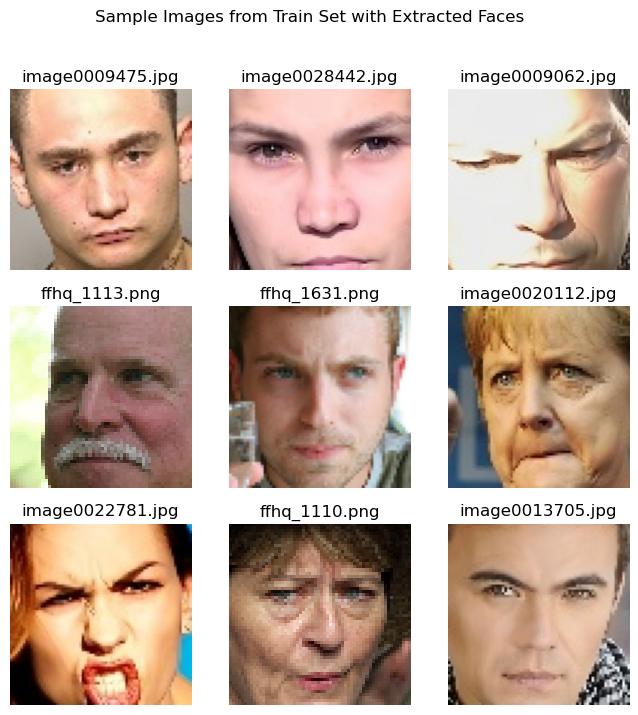

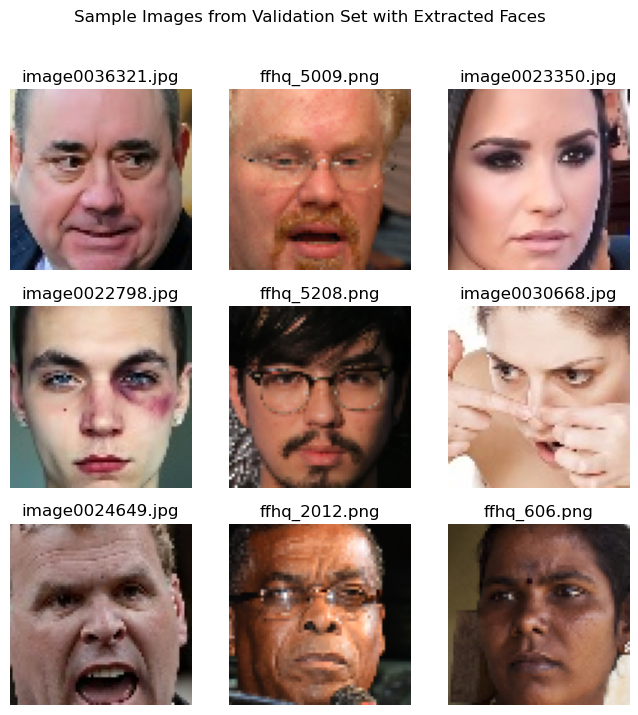

In [99]:
# Display train set images with extracted faces
display_image_with_face(train_image_dir, train_images)
plt.suptitle('Sample Images from Train Set with Extracted Faces')
plt.show()

# Display validation set images with extracted faces
display_image_with_face(valid_image_dir, valid_images)
plt.suptitle('Sample Images from Validation Set with Extracted Faces')
plt.show()

### Data augmentation

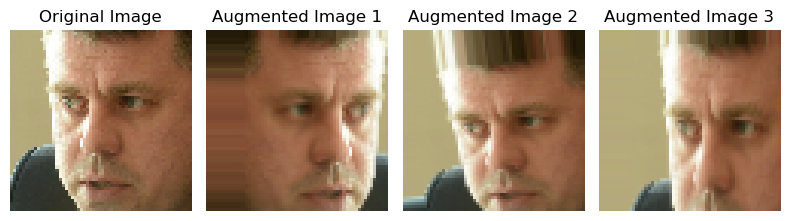

In [100]:
# Data augmentation parameters for training sets
train_datagen = ImageDataGenerator (
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation for validation and test sets (usually no augmentation is necessary for these data sets)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess a sample image for demonstration
sample_img_path = os.path.join(train_image_dir, train_images[0])
sample_img = extract_face(sample_img_path)
sample_img = cv.cvtColor(sample_img[0], cv.COLOR_BGR2RGB)
sample_img = sample_img.reshape((1,) + sample_img.shape) # Reshape to (1, height, width, channels)

# Display original and augmented images for comparison
plt.figure(figsize=(8, 8))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(sample_img[0])
plt.title('Original Image')
plt.axis('off')

# Augmented image
for i, augmented_img in enumerate(train_datagen.flow(sample_img, batch_size=1)):
    plt.subplot(1, 4, i + 2)
    plt.imshow(augmented_img[0])
    plt.title(f'Augmented Image {i + 1}')
    plt.axis('off')
    
    # Lets Display three augmented images for demonstration
    if i == 2:
        break

plt.tight_layout()
plt.show()

### Image generators

In [101]:
# Define image directories, train, validation sets for image generators
train_image_dir = os.path.join(image_dataset_dir, "train")
valid_image_dir = os.path.join(image_dataset_dir, "valid")
test_image_dir = os.path.join(image_dataset_dir, "test")

In [102]:
# Create generator for training, validation, and test sets

image_size = (96, 96) # We maintain original sizes of images.
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_image_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True # Enable shuffle to make model more robust
)



Found 17101 images belonging to 8 classes.
